# Measuring the probability distributions of Rydberg Hamiltonians
We know what the different topological phases are for different variations of the Hamiltonian at the ground state.

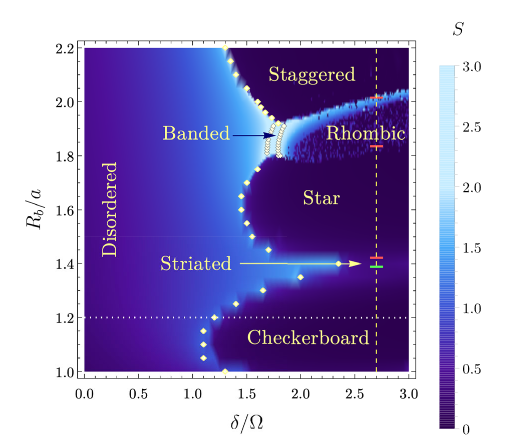

https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.124.103601

My goal is to explore this at different temperatures. In particular, we want to find a way to differentiate between temperatures.

When we make a measurement from the quantum computer or qmc on the rydberg atom array, we will obtain a sequence of 0s and 1s, with one digit corresopnding to each atom. If we represent a single sequence of 1s and 0s as the vector $\mathbf{x}$, then we would like to know what the probability distribution of the data is $p(\mathbf{x})$.

In the case of a 16x16 atom array, there are $2^{256}$ different possible states, though not all of them are reasonably likely. If we assume that there are $N$ equally probable states, if we were to sample $k$ times then the probability of none of them having the state is:

$$P(\text{unique states})=\frac{N!}{(N-k)!k^N}\approx\frac{(N/e)^N}{((N-k)/e)^{N-k} k^N}=\left(\frac{1}{(1-k/N)k}\right)^N=\frac{1}{k^Ne^{N \ln(1-k/N)}}\approx\frac{e^{k}}{k^N}$$
For a 16x16 array, we take $N=2^{256}$ and $k=10^6$
$$P(\text{unique states})=(1-2^{-256})^{0.5\cdot 10^6\cdot 10^6}\approx  1-10^{-65}$$
Note that $N$ is most definitely not this large and not all the probabilities are the same, but this is a heuristic.
For a 4x4 array, we take $N=2^{16}\approx 6\times 10^4$ and $k=10^6$, and we note that there are more samples than unique states so we cannot physically have all states be unique.


## The scaling problem
If we can reasonably measure a quantum computer $N=10^6$ times, we can only learn so much about the system.

If we have $n=20$ atoms, where each configuration of them has equal probabilities. Or, put in another way, if we have $2^n=2^{20}\approx 1.4\times 10^6$ states of the system which all have equal probability, then after $N$ measurements, half of them will be measured.
$$p=(1-2^{-n})^N\Rightarrow n=-\frac{\ln (1-p^{1/N})}{\ln 2}\approx 20.46 \quad (p=1/2)$$
Note that if we wanted $n=16\times 16$ atoms, this would have considerably more that $2^{20}$ possible states (though we can't say how many there are), making it very unlikely for any configuration to be measured twice. 

Thus trivially comparing sample distributions (simulation vs qc will not work), since the distributions will have nothing in common. 

Then how to we find the temperature? 
- We compute the average occupation.

How do we test if the noise of a quantum computer obeys the Gibbs distribution?
- Sample enough to get good number statistics on probability distribution. If the JSD divergence between distributions makes a noticable trough, then we would expect that to be the temperature. If the JSD is within the range of what it should be for a Gibbs state then it obeys the Gibbs distribution.
- If we can't sample enough to get good number statistics, the above approach cannot be used. In such a case
    * Use a neural network to find a probability distribution for the simulation, hopefully the data sampled informs the model enough of the population that it can accurately make predictions on new data (which will most likely be from outside the existing dataset). With this distribution, 

In [2]:
import torch
(torch.arange(int(6))[None]).repeat_interleave(4, dim=0)

tensor([[0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5]])

# Critical point of 16x16 array

As a test of the autocorrelation, took the sequence of values $\mathbf{x}_t$ that the Markov Chain Monte Carlo outputs. The values being correlated suggests that $\mathbf{x}_t$ should be very similar to $\mathbf{x}_{t+1}$. To measure this, I counted the number of differences between the values: $\text{sum}(|\mathbf{x}_{t+1}-\mathbf{x}_t|)$. To compare this with the completely uncorrelated case, I performed the same calculation with the dataset being shuffled. I then plotted the histograms of these two datasets to see how difference correlated values were from uncorrelated values. I found that after 1 iteration, the spins can change by 0-4 spin states for the 4x4 case, which is very different from the case of uncorrelated measurements. 

To test the autocorrelation, I plotted the histograms corresponding to $\text{sum}(|\mathbf{x}_{t+k}-\mathbf{x}_t|)$ for different values of $k$ to see after how many iterations $k$, the measurements are uncorrelated. 

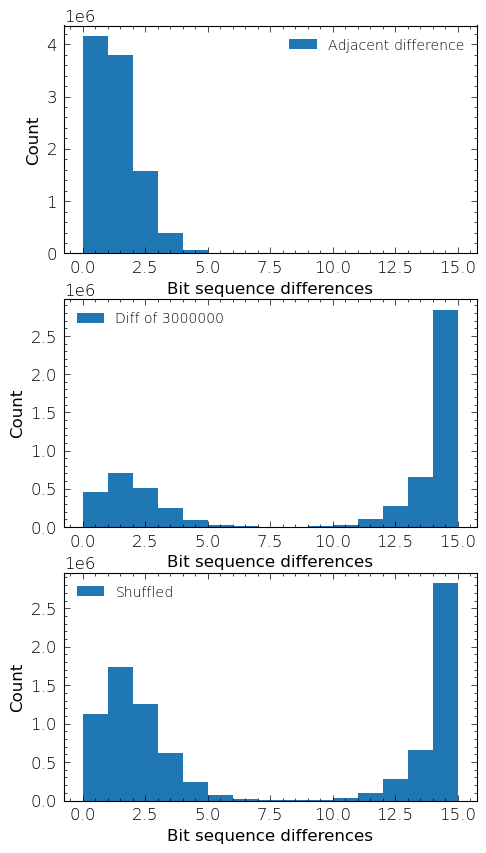

In the findings below, I found that for the checkerboard pattern with a degenerate checkerboard pattern, the autocorrelation time becomes very large, and increases dramatically for larger values of $\beta$. The degenerate checkerboard patterns occur for even width grids, where the checkerboard pattern with the top left being 1 has the same energy, and thus is equally and very likely, as the checkerboard pattern with the top left being 0.

For $\beta=0.1$
* For $\Delta=0.5$, it is mostly uncorrelated after 20-30 iterations
* For $\Delta=1.1$, it is mostly uncorrelated after 200-300 iterations
* For $\Delta=2.7$, it is mostly uncorrelated after ~50,000 iterations

For $\beta=0.16$
* For $\Delta=2.7$, it is mostly uncorrelated after ~500,000-1,000,000+ iterations

For $\beta=0.19$
* For $\Delta=2.7$, it is mostly uncorrelated after ~3,000,000+ iterations (can't fully test with this approach)

For $\beta=1.0$
* For $\Delta=0.5$, it is mostly uncorrelated after 20-30 iterations
* For $\Delta=1.1$, it is mostly uncorrelated after ~800 iterations
* Fpr $\Delta=2.7$, it is mostly uncorrelated after 30-40 iterations

For the checkerboard pattern, the autocorrelation time is too large (larger than $10^7$) so the state becomes non-ergotic for even reasonably somewhat high temperatures. 

## Relating energy with $\beta$ and average occupation

As what could be expected, the energy of the system increases with temperature. And likewise, the more energy the more atoms will be in the excited Rydberg state. This is a reasonable approach for estimating the temperature though it doesn't completely answer our question of whether estimating the noise can be modelled with the Gibbs state. Nonetheless, I wanted to plot how these variables could related to each other. In practice, we could then calculate the average occupation and use that to measure the temperature. We can also get an estimate of how the temperature will change based on how the energy changes; if a state is in the ground state, then its temperature will be indistinguishable from any state that is in the ground state.

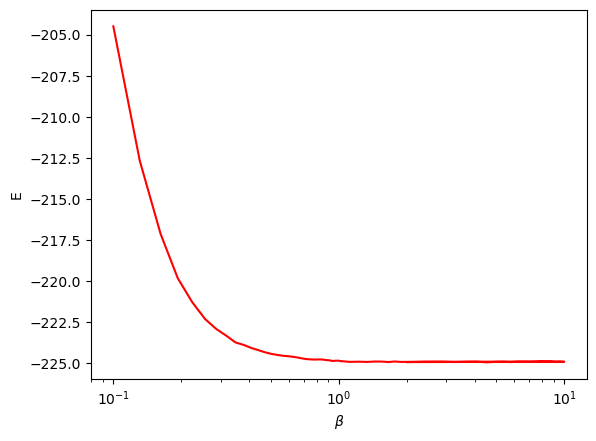
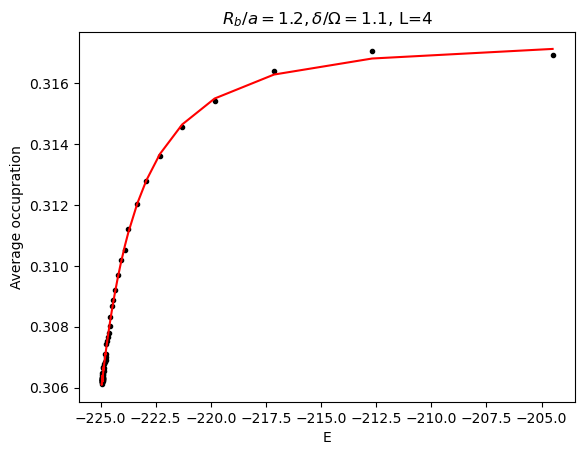

I fitted the average occupation to the energy with a polynomial with a negative power.

# Probability distribribution for $\Delta=0.5$ and $R_b=1.2$

/project/6000317/jkambulo/code/qc-temp/transformer


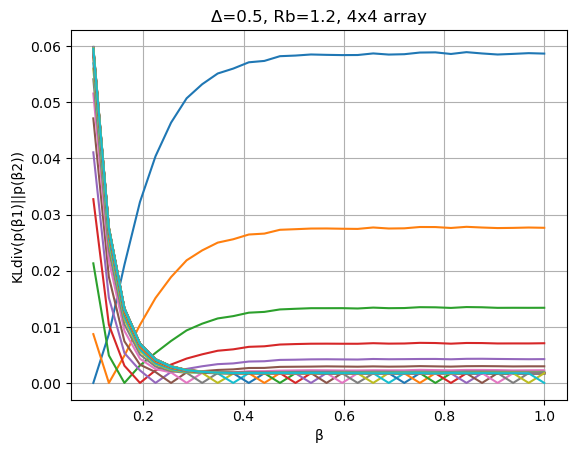

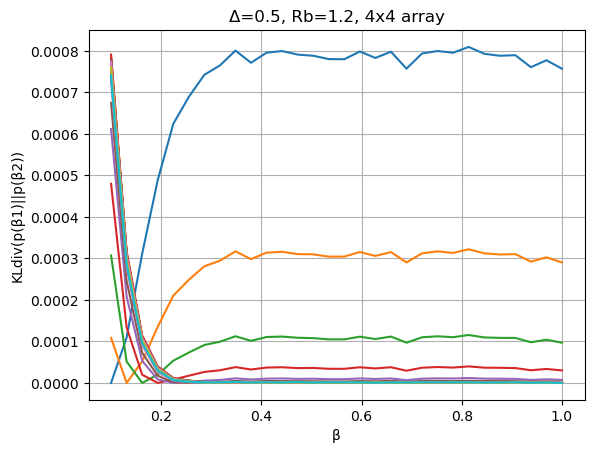

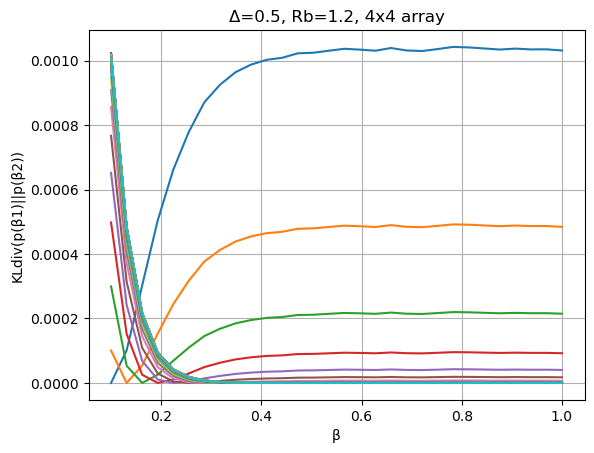

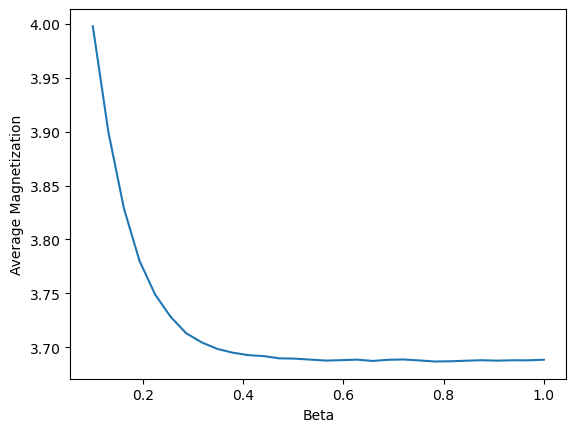

0.21878000000000003 +- 4.6773924359625845


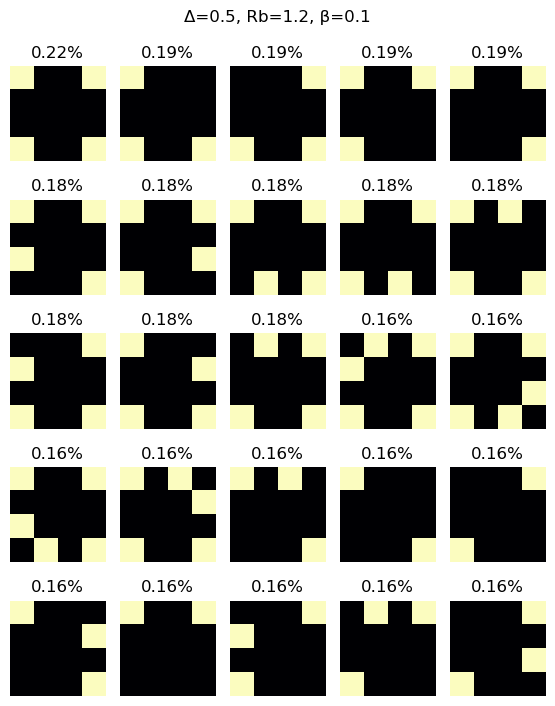

0.31824 +- 5.641276451300716


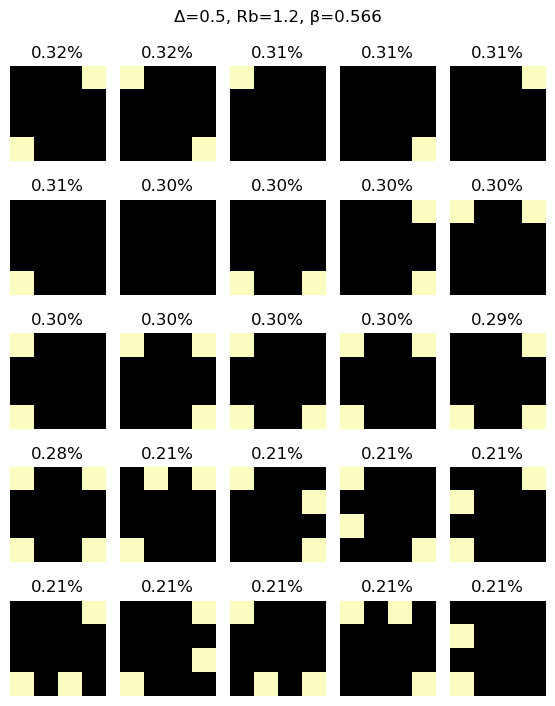

0.31757 +- 5.635334950116098


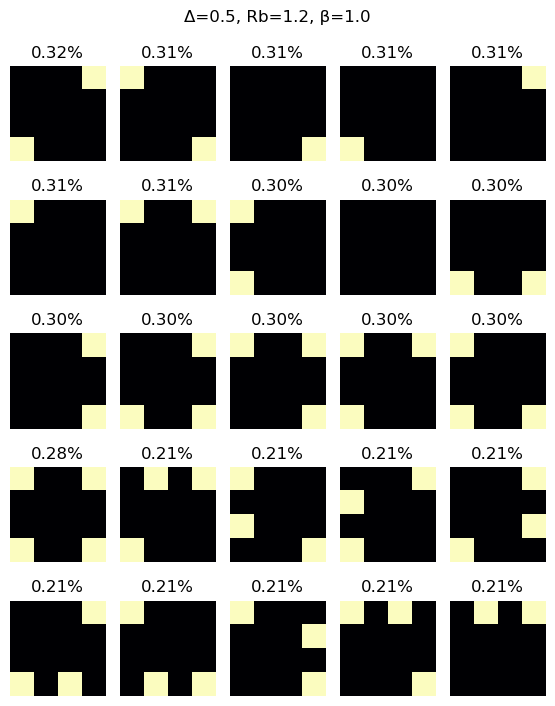

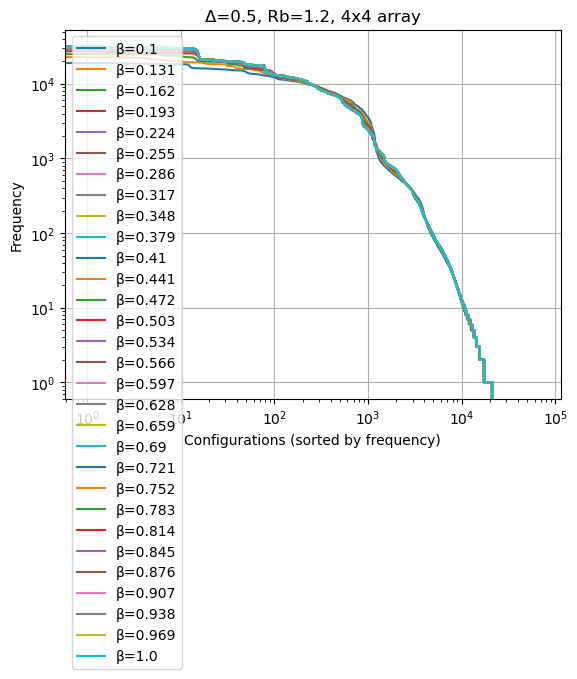

In [ ]:

%cd /project/6000317/jkambulo/code/qc-temp/transformer
from dataloader import QCTempDataset
delta = 0.5
dataset = QCTempDataset("/home/jkambulo/projects/def-rgmelko/jkambulo/data/qc-temp", size=(4,4), Rb_per_a=1.2, delta_per_omega=delta)

nsamples = dataset.get_nsamples()
natoms = dataset.get_natoms()
(bins, hist_list), (order_params, op_counts), (average_magnetization, std_av_magnetization), sorted_indices, beta_list = compute_histograms(dataset)
plot_KLdiv([hist/nsamples for hist in hist_list], beta_list, delta)
plot_KLdiv([op_count/nsamples for op_count in op_counts], beta_list, delta)
plot_KLdiv([np.array([1-av/natoms,av/natoms]) for av in average_magnetization], beta_list, delta)
plt.errorbar(beta_list, average_magnetization, yerr=std_av_magnetization)
plt.ylabel('Average Magnetization')
plt.xlabel('Beta')
plt.show()
for k in [0, 15, 29]:
    plot_common_configurations(hist_list[k]/nsamples, beta_list[k], sorted_indices[k], dataset.get_natoms(), delta)
plot_sorted_hist(hist_list,beta_list, sorted_indices, delta)


Observations
* For $\Delta=0.5$ (disordered state)
    * low $\beta$ values have their most frequent states being less common (2% compared to 1%), with the probabilities spread out to more states. This is expected since higher temperatures allow more states to be possible
    * Some of the most common states for all $\beta$ values are when the corners are filled, where higher temperatures want more corners to be filled (4 for low $\beta$, and 2 opposite corners for high $\beta$).
    * For low temperatures, common states are when few are filled. As the frequency drops, more and more atoms are put in. Filling up the corners in different permutations. The first state where atoms start a checkerboard pattern is when there are three atoms
    * For higher temperatures, higher number of atoms are more frequent than fewer. Small checkerboard patterns are much more frequent here.
    * The number of states that are possible are around the same for each temperature
    * The states which exist for increasing $\beta$ start being roughly the same. Small $\beta$ values have very different states than higher $\beta$ values, but $\beta$ changing from 0.5 to 1 doesn't have much of a change.
    
KL divergences
* For $p(\text{configuration})$
    * Plots don't have much noise going from one $\beta$ value to the next
    * KL divergence doesn't approach zero, except for when the datasets are identical (if this was a different seed, I would expect the KLdiv to be normal)
    * Plot looks quite like the p(1 or 0) plot except shifted up.
* For $p(\text{order})$
    * Plots have a significant amount of noise from one $\beta$ to the next
    * KL divergence does none-the-less approach 0 because of number statistics
    * In this case, the plot looks like the 0s and 1s KL divergece, but doesn't seem to always be the case
* For $p(\{0,1\})$
    * KL divergence approaches 0 because of number statistics
    * Curve is smooth
    * This means that just the amount of 0s and 1s (so long as it doesn't reach the ground state) is capable of identifying the state.

Magnetization vs temperature
* This plot shows that using the average number of excited atoms, you can get a reasonable estimate of the temperature. However, this doesn't show that the error can be characterized as a temperature, only that if there was a temperature it would be the one found here. 

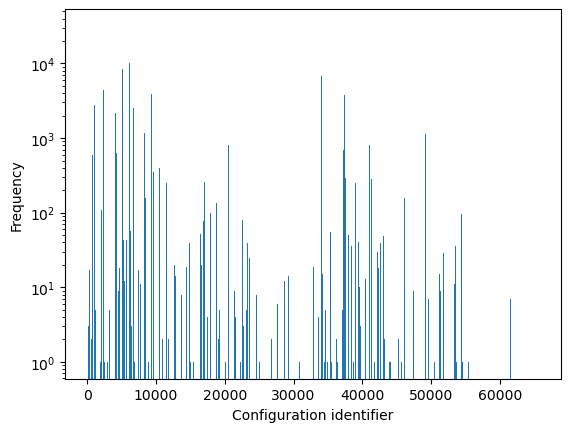

In [ ]:
plt.bar(bins[:-1], hist_values)
plt.yscale('log')
plt.xlabel('Configuration identifier')
plt.ylabel('Frequency')
plt.show()

# Probability distribribution for $\Delta=1.1$ and $R_b=1.2$

/project/6000317/jkambulo/code/qc-temp/transformer


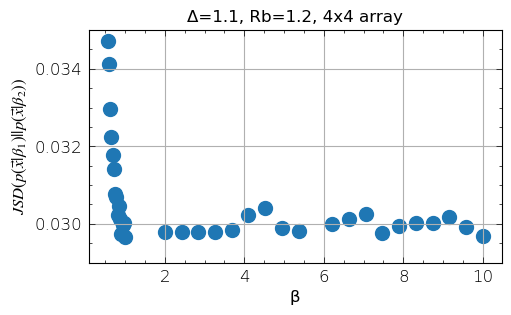

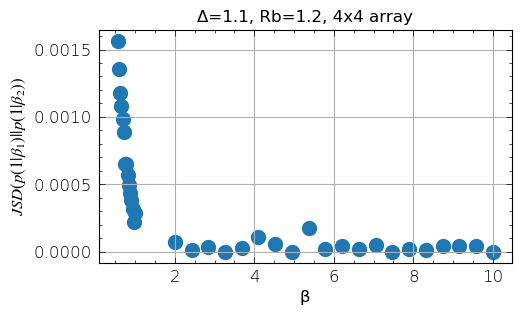

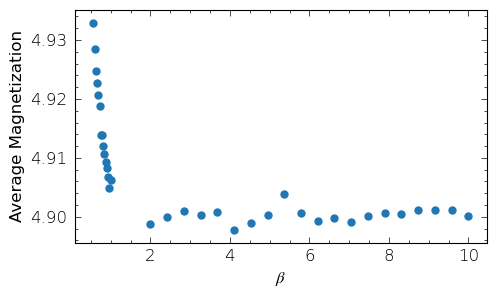

0.62244 +- 7.889486675316714


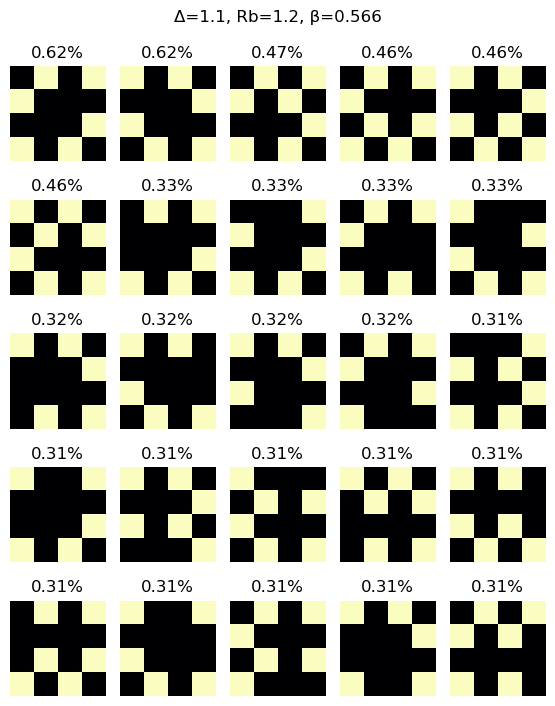

0.56102 +- 7.490126834707141


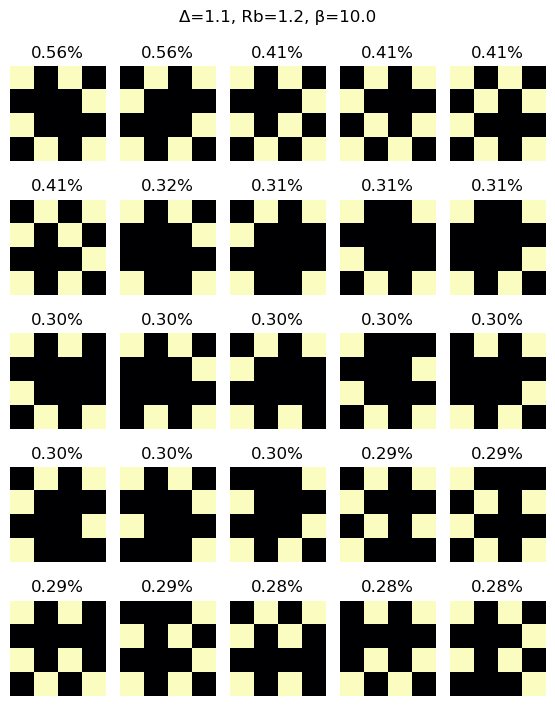

0.56061 +- 7.487389398181452


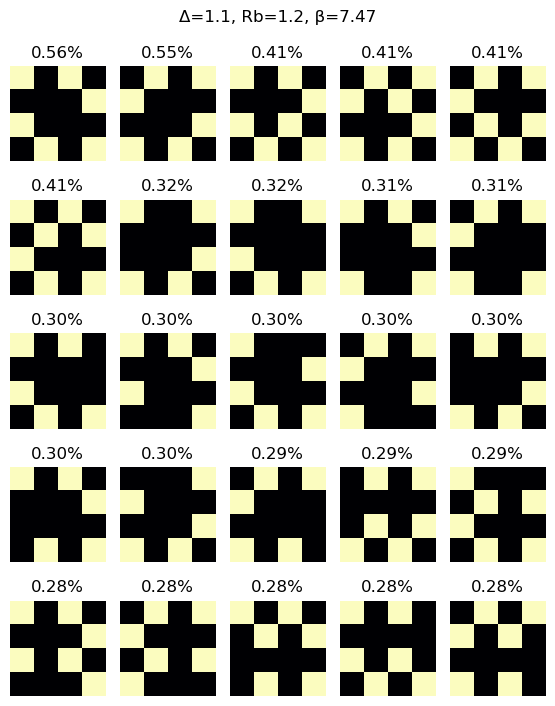

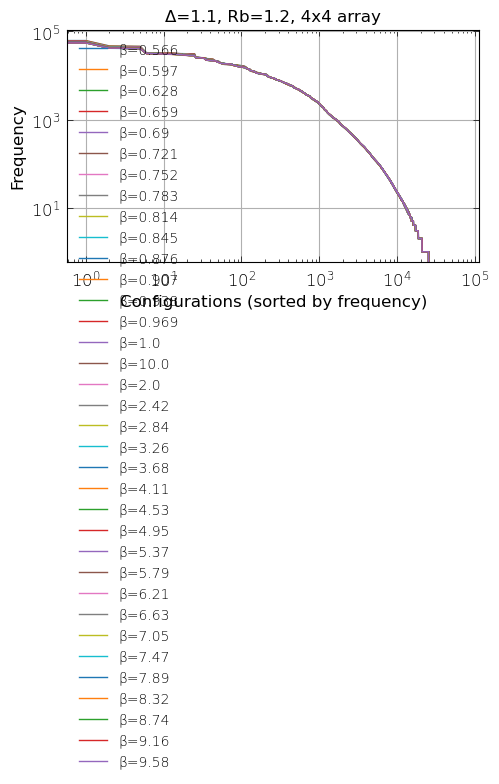

In [27]:
%cd /project/6000317/jkambulo/code/qc-temp/transformer
from dataloader import QCTempDataset
delta = 1.1
# dataset = QCTempDataset("/home/jkambulo/projects/def-rgmelko/jkambulo/data/qc-temp", size=(4,4), Rb_per_a=1.2, delta_per_omega=delta)

nsamples = dataset.get_nsamples()
natoms = dataset.get_natoms()
# (bins, hist_list), (order_params, op_counts), (average_magnetization, std_av_magnetization), sorted_indices, beta_list = compute_histograms(dataset, dataset_slice=slice(15,None))
plot_JSD(hist_list, beta_list, delta, slice(25,26),show=False)
plt.ylabel(r"$JSD(p(\vec{x}|\beta_1) || p(\vec{x}|\beta_2))$")
plt.ylim([0.029,0.035])
plt.show()
# plot_JSD(op_counts, beta_list, delta)
plot_JSD([np.array([1-av/natoms,av/natoms]) for av in average_magnetization], beta_list, delta, slice(15,16),show=False)
plt.ylabel(r"$JSD(p(1|\beta_1) || p(1|\beta_2))$")
plt.show()
plt.errorbar(beta_list, average_magnetization, yerr=std_av_magnetization, fmt='.')
plt.ylabel('Average Magnetization')
plt.xlabel(r'$\beta$')
plt.show()
for k in [0, 15, 29]:
    plot_common_configurations(hist_list[k]/nsamples, beta_list[k], sorted_indices[k], dataset.get_natoms(), delta)
plot_sorted_hist(hist_list,beta_list, sorted_indices, delta)

In [17]:
len(beta_list), len(hist_list), len(op_counts)
print(op_counts)

(array([2441755, 4076289, 2354618,  904894,  199798,   21652,     979,
            15]), array([2442897, 4074738, 2355511,  904559,  199687,   21538,    1054,
            16]), array([2442135, 4070293, 2356663,  907173,  201030,   21607,    1082,
            17]), array([2441568, 4074496, 2354759,  906115,  200766,   21262,    1016,
            18]), array([2439145, 4073756, 2355975,  907048,  201144,   21852,    1058,
            22]), array([2435790, 4067088, 2360511,  910727,  202897,   21939,    1035,
            13]), array([2436657, 4069045, 2358548,  909760,  203120,   21831,    1024,
            15]), array([2437476, 4069707, 2357655,  910624,  201899,   21548,    1076,
            15]), array([2436959, 4066047, 2360344,  910660,  203121,   21820,    1039,
            10]), array([2431992, 4068555, 2358777,  913251,  204241,   22128,    1042,
            14]), array([2438904, 4066048, 2358387,  909766,  203722,   22147,    1011,
            15]), array([2436391, 4068208, 235663

# Probability distribribution for $\Delta=2.7$ and $R_b=1.2$

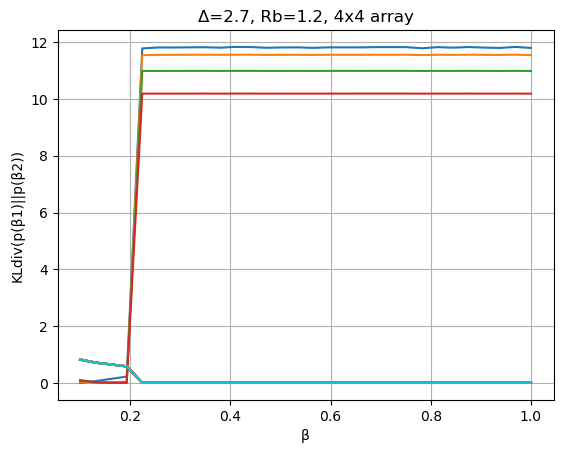

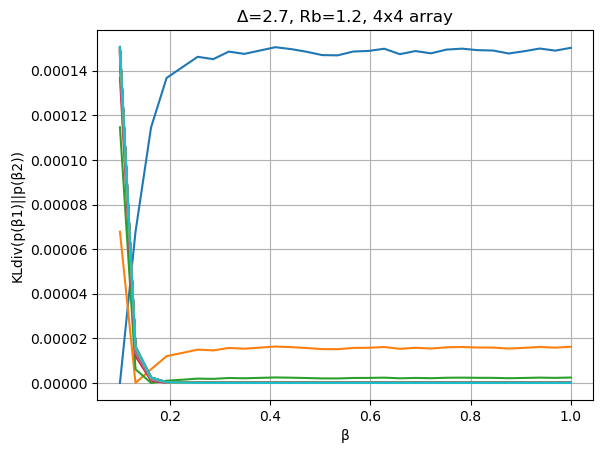

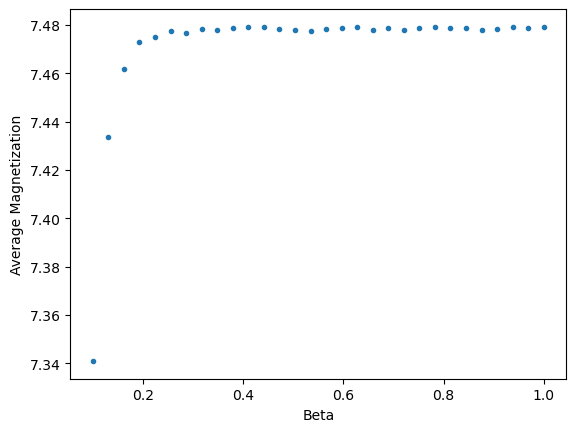

18.98909 +- 43.5764730101003


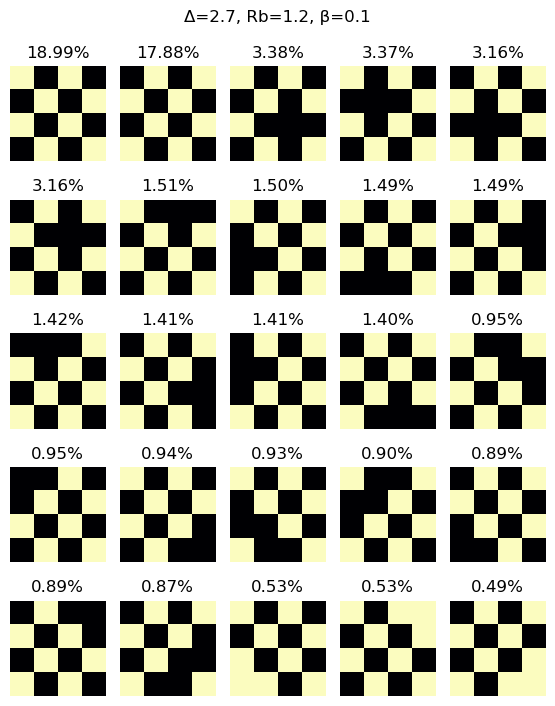

45.87302 +- 67.72962424227673


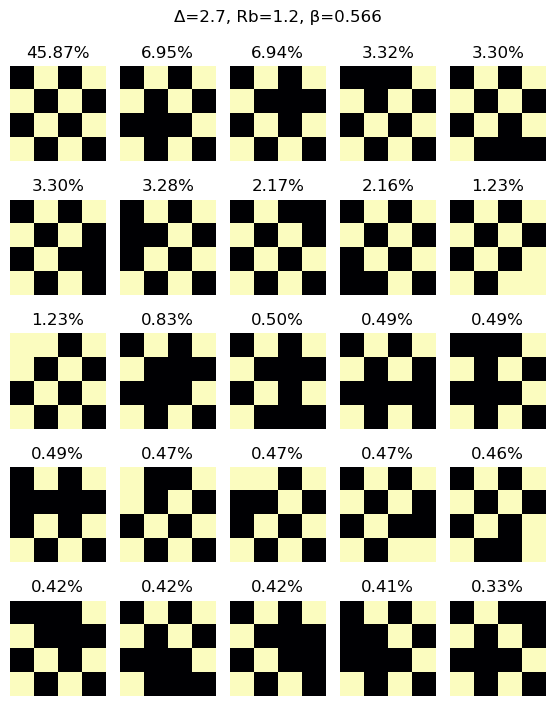

45.93559 +- 67.77579951575636


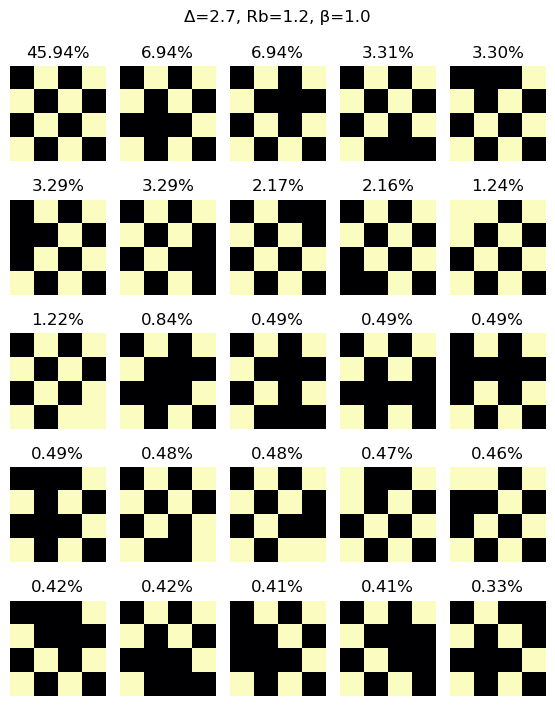

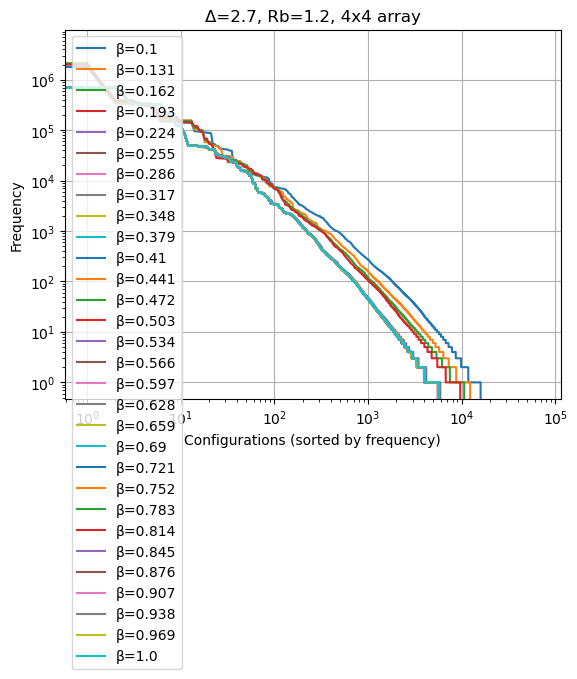

In [ ]:
# %cd /project/6000317/jkambulo/code/qc-temp/transformer
# from dataloader import QCTempDataset
# import matplotlib.pyplot as plt
# import numpy as np
# delta = 2.7
# dataset = QCTempDataset("/home/jkambulo/projects/def-rgmelko/jkambulo/data/qc-temp", size=(4,4), Rb_per_a=1.2, delta_per_omega=delta)

# nsamples = dataset.get_nsamples()
# natoms = dataset.get_natoms()
# (bins, hist_list), (order_params, op_counts), (average_magnetization, std_av_magnetization), sorted_indices, beta_list = compute_histograms(dataset)

plot_KLdiv([(hist+0.00001)/np.sum(hist+0.00001) for hist in hist_list], beta_list, delta)
# plot_KLdiv([op_count/nsamples for op_count in op_counts], beta_list, delta)
plot_KLdiv([np.array([1-av/natoms,av/natoms]) for av in average_magnetization], beta_list, delta)
plt.errorbar(beta_list, average_magnetization, yerr=std_av_magnetization, fmt='.')
plt.ylabel('Average Magnetization')
plt.xlabel('Beta')
plt.show()
for k in [0, 15, 29]:
    plot_common_configurations(hist_list[k]/nsamples, beta_list[k], sorted_indices[k], dataset.get_natoms(), delta)
plot_sorted_hist(hist_list,beta_list, sorted_indices, delta)




* In the checkerboard pattern, the ground state is reached at relatively high temperatures ($\beta=0.2$)
* For higher temperatures, the inverse full checkerboard pattern is equally common as the normal full checkerboard pattern. However, for lower temperatures, the inverse full checkerboard pattern becomes statistically infavorable.

If the temperature of the quantum computer doesn't depend on the Hamiltonian, then to find the temperature even when it is very low, we will want to find a state where the ground state is at a very low temperature. From these results, have a really large $\Delta$ makes the ground state have a very high temperature. Low $\Delta$ values have a somewhat high ground state temperature. The critical point seems to have the lowest ground state temperature. 

1. I want to make a plot of ground state temperature vs $\Delta/\Omega$ at $R_b=1.2$
    1. What do you consider the ground state temperature?
2. I want to have some error bars for the KL divergence to see, what the minimum number of samples are required to be confident about what the temperature is.
    

## Error of estimating Temperature

/project/6000317/jkambulo/code/qc-temp/transformer
1.2277777777777779
1.6384931255169337 1.0943067405937725


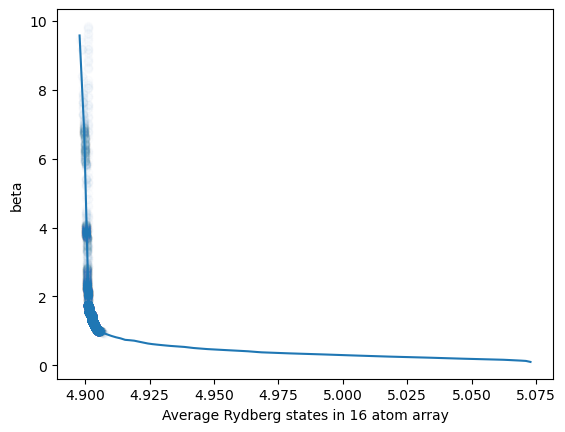

In [5]:
%cd /project/6000317/jkambulo/code/qc-temp/transformer
# from scipy.interpolate import make_interp_spline
# from dataloader import QCTempDataset
# import matplotlib.pyplot as plt
# import numpy as np
# delta = 1.1
# dataset = QCTempDataset("/home/jkambulo/projects/def-rgmelko/jkambulo/data/qc-temp", size=(4,4), Rb_per_a=1.2, delta_per_omega=delta)

nmeasurements = 1e6
# nsamples = dataset.get_nsamples()
# magnetization = [np.sum(data)/nsamples for data in dataset.datasets]
# f = make_interp_spline(sorted(magnetization), dataset.beta[::-1],k=1) # I'm sorting to make it monotonically increasing (just an estimate)
x=np.linspace(min(magnetization),max(magnetization),100)
plt.plot(x, f(x))
print(dataset.beta[32])
samples = np.random.normal(loc=np.sum(dataset.datasets[32])/nsamples,
                           scale=np.std(np.sum(dataset.datasets[5],axis=0))/np.sqrt(nmeasurements), 
                           size=(10000,))
plt.scatter(samples, f(samples), alpha=0.01, marker='o')
plt.ylabel('beta')
plt.xlabel("Average Rydberg states in 16 atom array")
result = f(samples)
print(np.mean(result),np.std(result))

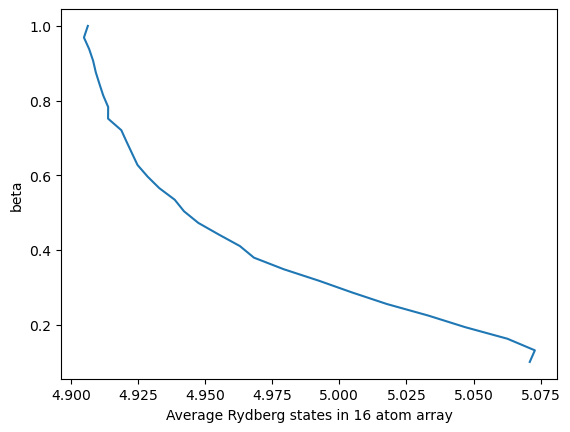

In [ ]:
# the actual plot, if I didn't sort it. 
plt.plot(magnetization, dataset.beta)
plt.ylabel('beta')
plt.xlabel("Average Rydberg states in 16 atom array")
plt.show()

The $\beta$ accuracy depends on the $\beta$ value which the quantum computer looks like. High $\beta$ values (low temperatures) will have lower accuracy.
| Measurements | Worse case accuracy | Best case accuracy |
| --- | --- | --- |
| $10^4$ | bad | 0.027 |
| $10^5$ | 0.09 | 0.0086 |
| $10^6$ | 0.030 | 0.0027 |
| $10^7$ | 0.010 | 0.0008 |

In [ ]:
from scipy.spatial.distance import jensenshannon
# (bins, hist_list), (order_params, op_counts), (average_magnetization, std_av_magnetization), sorted_indices, beta_list = compute_histograms(dataset)
# plot_KLdiv([hist/nsamples for hist in hist_list], beta_list, delta, slice(0,-1,5))

x = np.arange(2**16)
i1, i2 = -3, -5
size1 = 7
size2 = 6
p_dist = hist_list[i1]/np.sum(hist_list[i1])
p_dist2 = hist_list[i2]/np.sum(hist_list[i2])
print(beta_list[i1], beta_list[i2])
print(jensenshannon(p_dist, p_dist2))
samples = 8
jsd = np.zeros((samples))
for i in range(samples):
    p1 = np.histogram(np.random.choice(x[:-1],p=p_dist, size=(10**size1,), replace=True), bins=x, density=True)[0]
    p2 = np.histogram(np.random.choice(x[:-1],p=p_dist2, size=(10**size2,), replace=True), bins=x, density=True)[0]
    jsd[i] = jensenshannon(p1, p2)
    
print(rf"| $10^{size1}$ | $10^{size2}$ | {beta_list[i1]:.3f} | {beta_list[i2]:.3f} | ${np.mean(jsd,axis=0):.4f} \pm {np.std(jsd, axis=0):.4f}$ |" )



0.9379310344827586 0.8758620689655172
0.026401281936247186
| $10^7$ | $10^6$ | 0.938 | 0.876 | $0.0567 \pm 0.0002$ |


If we have a dataset of size $N_1$ with $\beta_1$ and we calculate the JSD with another dataset of size $N_2$ and $\beta_2$, these are the expected ranges we can expect (we would recalculate for the $\beta$ value we measure). If when numberically comparing the experimental data with simulated data for the corresponding $\beta$ and they exceed the JSD range of what would be expected when the $\beta$ values are the same, then the distribution doesn't look enough like that temperature.

| $N_1$ | $N_2$ |$\beta_1$ | $\beta_2$ | JSD |
| --- | --- | --- | --- | --- |
| $10^7$ | $10^6$ | 0.224 | 0.193 | $0.0629 \pm 0.0002$ |
| $10^7$ | $10^6$ | 0.224 | 0.224 | $0.0560 \pm 0.0003$ |
| $10^7$ | $10^6$ | 0.224 | 0.255 | $0.0621 \pm 0.0002$ |
| $10^7$ | $10^5$ | 0.224 | 0.193 | $0.1360 \pm 0.0004$ |
| $10^7$ | $10^5$ | 0.224 | 0.224 | $0.1335\pm 0.0004$ |
| $10^7$ | $10^5$ | 0.224 | 0.255 | $0.1365 \pm 0.0007$ |
| $10^7$ | $10^5$ | 0.224 | 1.000 | $0.1463 \pm 0.0005$ |
| $10^7$ | $10^5$ | 0.100 | 1.000 | $0.1777 \pm 0.0007$ |
| $10^7$ | $10^4$ | 0.224 | 0.193 | $0.2849 \pm 0.0013$ |
| $10^7$ | $10^4$ | 0.224 | 0.224 | $0.2852 \pm 0.0010$ |
| $10^7$ | $10^4$ | 0.224 | 0.255 | $0.2880 \pm 0.0010$ |
| $10^7$ | $10^4$ | 0.224 | 1.000 | $0.2912 \pm 0.0016$ |
| $10^7$ | $10^4$ | 0.100 | 1.000 | $0.3093 \pm 0.0022$ |
| $10^7$ | $10^5$ | 0.969 | 0.938 | $0.1388 \pm 0.0005$ |
| $10^7$ | $10^5$ | 0.969 | 0.969 | $0.1376 \pm 0.0005$ |
| $10^7$ | $10^5$ | 0.969 | 1.000 | $0.1384 \pm 0.0004$ |
<!-- | $10^6$ | $10^6$ | 0.224 | 0.193 | $0.0765 \pm 0.0003$ |
| $10^6$ | $10^6$ | 0.224 | 0.224 | $0.0711 \pm 0.0001$ |
| $10^6$ | $10^6$ | 0.224 | 0.255 | $0.0758 \pm 0.0001$ |
| $10^6$ | $10^6$ | 0.969 | 0.938 | $0.0764 \pm 0.0003$ |
| $10^6$ | $10^6$ | 0.969 | 0.969 | $0.0725 \pm 0.0003$ |
| $10^6$ | $10^6$ | 0.969 | 1.000 | $0.0765 \pm 0.0003$ | -->


# Measuring temperature for large $\beta$

In [ ]:
%cd /project/6000317/jkambulo/code/qc-temp/transformer
from dataloader import QCTempDataset
delta = 1.2
dataset = QCTempDataset("/home/jkambulo/projects/def-rgmelko/jkambulo/data/qc-temp", size=(4,4), Rb_per_a=1.1, delta_per_omega=delta)

nsamples = dataset.get_nsamples()
natoms = dataset.get_natoms()
(bins, hist_list), (order_params, op_counts), (average_magnetization, std_av_magnetization), sorted_indices, beta_list = compute_histograms(dataset)

/project/6000317/jkambulo/code/qc-temp/transformer


0.9001699999999999 +- 9.487728916869411


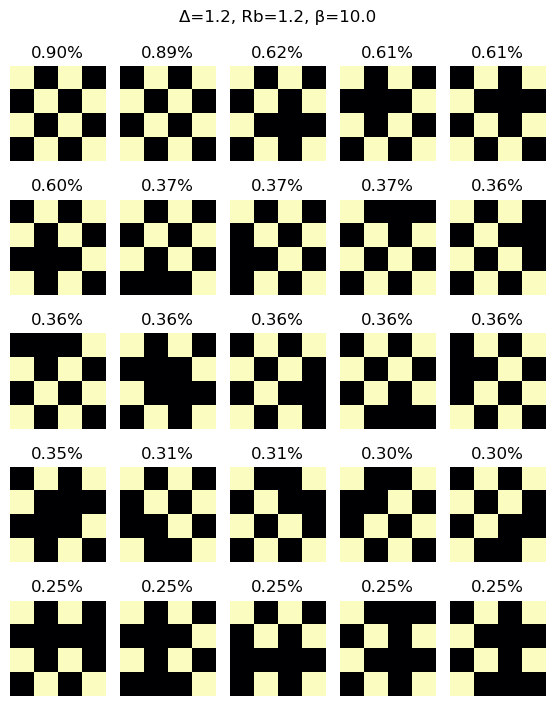

0.90493 +- 9.512780876273773


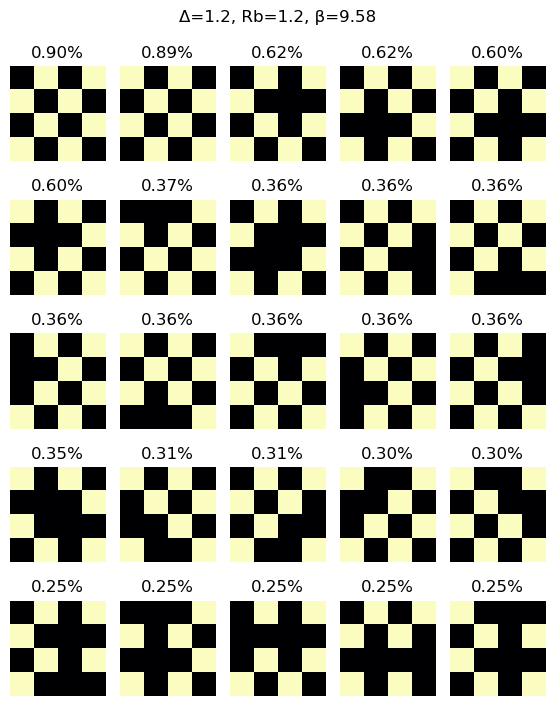

In [ ]:
plot_common_configurations(hist_list[0]/nsamples, beta_list[0], sorted_indices[0], dataset.get_natoms(), delta)
plt.show()
plot_common_configurations(hist_list[-1]/nsamples, beta_list[-1], sorted_indices[-1], dataset.get_natoms(), delta)

/tmp/ipykernel_24365/779593906.py:76: RuntimeWarning: invalid value encountered in sqrt
  print(f"{freq*100} +- {np.sqrt(freq)*100}")


-0.01408 +- nan


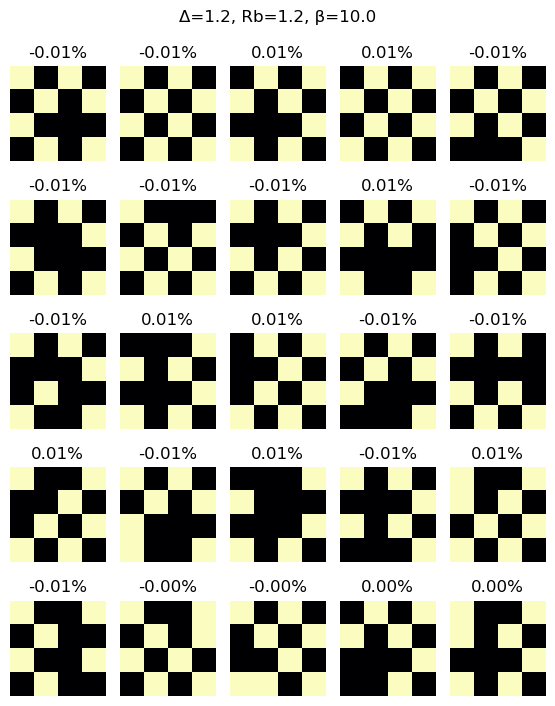

In [ ]:
vals = hist_list[4] - hist_list[0]
i = np.argsort(np.abs(vals))
plot_common_configurations(vals/nsamples, beta_list[0], i, dataset.get_natoms(), delta)
plt.show()

In [ ]:
p_dist = hist_list[0]/nsamples
x = np.arange(2**16)
size1 = 7

# iters = 20
# p = np.zeros((iters, len(x)-1))
# for i in range(iters):
#     p1 = np.histogram(np.random.choice(x[:-1],p=p_dist, size=(10**size1,), replace=True), bins=x, density=True)[0]
#     p[i] = p1

print(np.mean(p, axis=0))
print(np.std(p, axis=0)/np.mean(p, axis=0))
print(1/np.sqrt(hist_list[0]))

[1.2105e-05 4.0585e-05 2.0080e-05 ... 0.0000e+00 0.0000e+00 0.0000e+00]
[0.12057949 0.04796368 0.0609648  ...        nan        nan        nan]
[0.09166985 0.0496904  0.07071068 ...        inf        inf        inf]


/tmp/ipykernel_7869/4098821192.py:12: RuntimeWarning: invalid value encountered in divide
  print(np.std(p, axis=0)/np.mean(p, axis=0))
/tmp/ipykernel_7869/4098821192.py:13: RuntimeWarning: divide by zero encountered in divide
  print(1/np.sqrt(hist_list[0]))


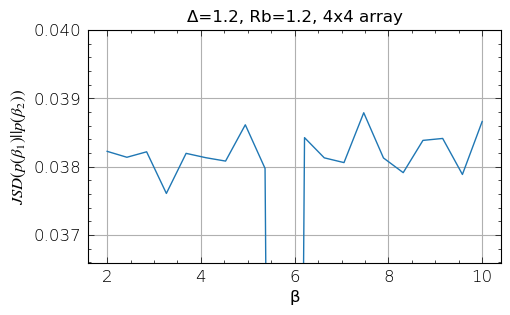

In [ ]:
plot_JSD(np.roll(hist_list,-1), np.roll(beta_list,-1), delta, show=False,beta_of_interest=slice(9,10))
plt.ylim([0.0366, 0.04])
plt.show()

In [ ]:
dataset = QCTempDataset("/home/jkambulo/projects/def-rgmelko/jkambulo/data/qc-temp", size=(4,4), Rb_per_a=1.2, delta_per_omega=1.1)

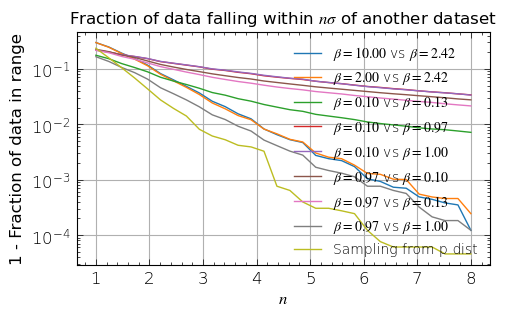

In [ ]:
from scipy.special import erf
from scipy.stats import poisson
import numpy as np

data = dataset.datasets
natoms = dataset.get_natoms()
f = lambda x: np.sum(x*(2**np.arange(natoms))[None], axis=1)
ncomb = 2**natoms

bins = np.arange(ncomb)
hist_list2 = [np.histogram(f(d[:].T), bins=bins)[0] for d in [data[0],data[1], data[-2],data[-1]]]
beta_list2 = [dataset.beta[0], dataset.beta[1],dataset.beta[-2], dataset.beta[-1]]

j = 2

mu = 300
nstd_list = np.linspace(1,8,30)
for i in range(2):
    data = []
    for nstd in nstd_list:
        # print(f'std = {nstd}')
        # print(erf(nstd/np.sqrt(2)))
        # print(poisson(mu).cdf(mu+nstd*np.sqrt(mu)) - poisson(mu).cdf(mu-nstd*np.sqrt(mu)))
        data.append(1-np.sum(((hist_list[i] - nstd*np.sqrt(hist_list[i]) <= hist_list[j]) &
                    (hist_list[j] <= hist_list[i] + nstd*np.sqrt(hist_list[i]))) |
                    (hist_list[i] == 0))/(2**16-1))
        # print(data[-1])
        # print('-'*100)
    plt.plot(nstd_list, data, label=rf'$\beta={beta_list[i]:.2f}$ vs $\beta={beta_list[j]:.2f}$')

for i in [0,2]:
    for j in [k for k in range(4) if k!=i]:
        data = []
        for nstd in nstd_list:
            data.append(1-np.sum(((hist_list2[i] - nstd*np.sqrt(hist_list2[i]) <= hist_list2[j]) &
                        (hist_list2[j] <= hist_list2[i] + nstd*np.sqrt(hist_list2[i]))) |
                        (hist_list2[i] == 0))/(2**16-1))
            
        plt.plot(nstd_list, data, label=rf'$\beta={beta_list2[i]:.2f}$ vs $\beta={beta_list2[j]:.2f}$')

# plt.plot(nstd_list[:12], 1-erf(nstd_list[:12]/np.sqrt(2)), label='Erf')
plt.plot(sample_nstd_list, sample_data, label='Sampling from p dist')
# plt.plot(nstd_list, 1-(poisson(mu).cdf(mu+nstd_list*np.sqrt(mu)) - poisson(mu).cdf(mu-nstd_list*np.sqrt(mu))), label='Poisson')
plt.xlabel(r"$n$")
plt.ylabel("1 - Fraction of data in range")
plt.title(r'Fraction of data falling within $n\sigma$ of another dataset')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

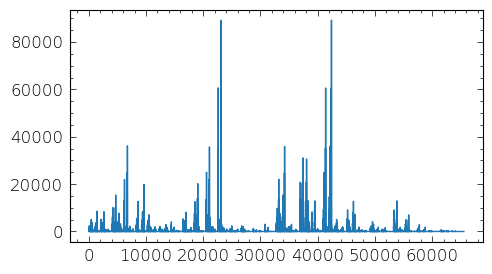

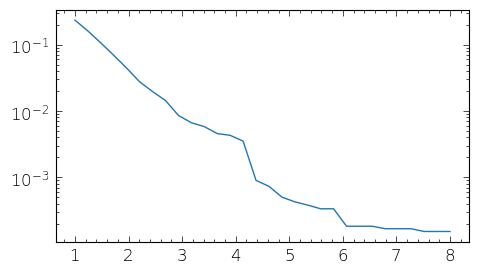

In [ ]:
x = np.arange(2**16)
dist = sum(hist_list)/len(hist_list)/nsamples

sample = np.random.choice(x[:-1], size=(nsamples,), p=dist)
dist *= nsamples
sample = np.histogram(sample, bins=x)[0]
plt.plot(x[:-1], sample)
plt.show()
sample_data = []
sample_nstd_list = np.linspace(1,8,30)
for nstd in sample_nstd_list:
    # print(f'std = {nstd}')
    # print(erf(nstd/np.sqrt(2)))
    # print(poisson(mu).cdf(mu+nstd*np.sqrt(mu)) - poisson(mu).cdf(mu-nstd*np.sqrt(mu)))
    sample_data.append(1-np.sum(((dist - nstd*np.sqrt(dist) <= sample) &
                (sample <= dist + nstd*np.sqrt(dist))) |
                (dist == 0))/(2**16-1))
# plt.plot(x,dist)
# plt.xlim([950,1050])
plt.plot(sample_nstd_list, sample_data)
plt.yscale('log')

# Characterizing noise of Acquila data (11x11)
Anna Knorr gave me QuEra Acquila data to work with. After some analysis, I found the following about them
1. In each file (C_2D_star_XX.json/.results) contains 200 shots with a single Hamiltonian. 
2. Different files vary the Hamiltonian only by varying the atomic distance $a$. The first file has $a=4\mu m$ and the following file increments this by $0.1$, leading to the 36th file having $a=4+(36-1)*0.1=7.5 \mu m$
3. Beyond the interatomic distance, each Hamiltonian is specified by a time-dependent tuning parameter and Rabi frequency for adiabatic evolution (the phase parameter is left as zero). The Hamiltonian can be generated with the following julia code:
```julia
t = [0,0.25,2.75,3]
Δ = piecewise_linear(clocks = t, values = 8.75*[-2pi,-2pi,2pi,2pi])
Ω = piecewise_linear(clocks = t, values = 2.5*[0,2pi,2pi,0])
ϕ = piecewise_linear(clocks = [0,3], values = [0,0])
a = 4
atoms = generate_sites(SquareLattice(), 11, 11, scale = a)
h = rydberg_h(atoms; Δ=Δ, Ω=Ω,ϕ=ϕ)
```
4. In the phase space, we have: $\Delta/\Omega = 3.5$ and $R_a/a=(C/\Omega)^{1/6}/a=(2π\times 862690/(2.5\times 2\pi))^{1/6}/4= 2.093$ (rhombic/star phase) to $R_a/a=(2π\times 862690/(2.5\times 2\pi))^{1/6}/7.5= 1.11$ (checkerboard phase).

# Steps to Characterizing Noise
1. Select a Hamiltonian near the critical point. 
    * This will have the largest variety of states (more than the disordered)
    * The ground state will occur at lower temperatures.
    * The "magnetization" will change the most steadily when you increase the temperature. This allows you calculate the temperature with reasonable accuracy.
2. Measure the number of rydberg states. If $10^5$ iterations are done, you can get an estimate of the temperature to an accuracy of $\pm 0.09$ in the worst case and $\pm 0.027$ in the best case.
3. Now that we know what the temperature should be, we want to know how the error compares to normal simulations with that temperature. 

# Acquila limitations
I recently found the newly released QuEra Acquila "documentation" outling various important parts of the quantum computer which we couldn't have known without working very closely with the quantum computer. It can be found [here](https://assets.website-files.com/643b94c382e84463a9e52264/648f5bf4d19795aaf36204f7_Whitepaper%20June%2023.pdf). 

An important fact that we found was size that Acquila would allow. Going in, I thought that the limitation of Acquila was that you could have only 256 atoms trapped and you had a very large amount of space. We can indeed use a maximum of 256, but it turns out that given the amount of room which we can fit the traps, for our purposes, it will have to be significantly less than this. For non-premium usage (I don't know what this entails), you can fit your atoms in a region of size $75 \mu m$ by $76 \mu m$. They also limit the minimum distance that you can place atoms to larger than $4\mu m$. Given the size of this region, you will be able to fit 16 atoms with an interatomic distance of $5\mu m$ or less. However this is not what we want, since we want to have $R_b/a\approx 1.2$, along the horizontal line crossing the checkerboard phase. This requires an interatomic distance of $\sim 7.5\mu m$ which would allow a maximum of an 11x11 grid (similar to what Anna Knorr did with Acquila previously).

This would mean that we cannot use a 4x4 grid of 4x4 atoms since we wouldn't have close to enough space. Instead the plan is to put 4 4x4 grids on the corners of the region to make all grids as far away as possible. We want them far away so that there isn't any interaction between the 4x4 grids since we want them to be indepedent of each other. This is how they would look for a reasonable (upper bound) interatomic distance of $7.5 \mu m$.

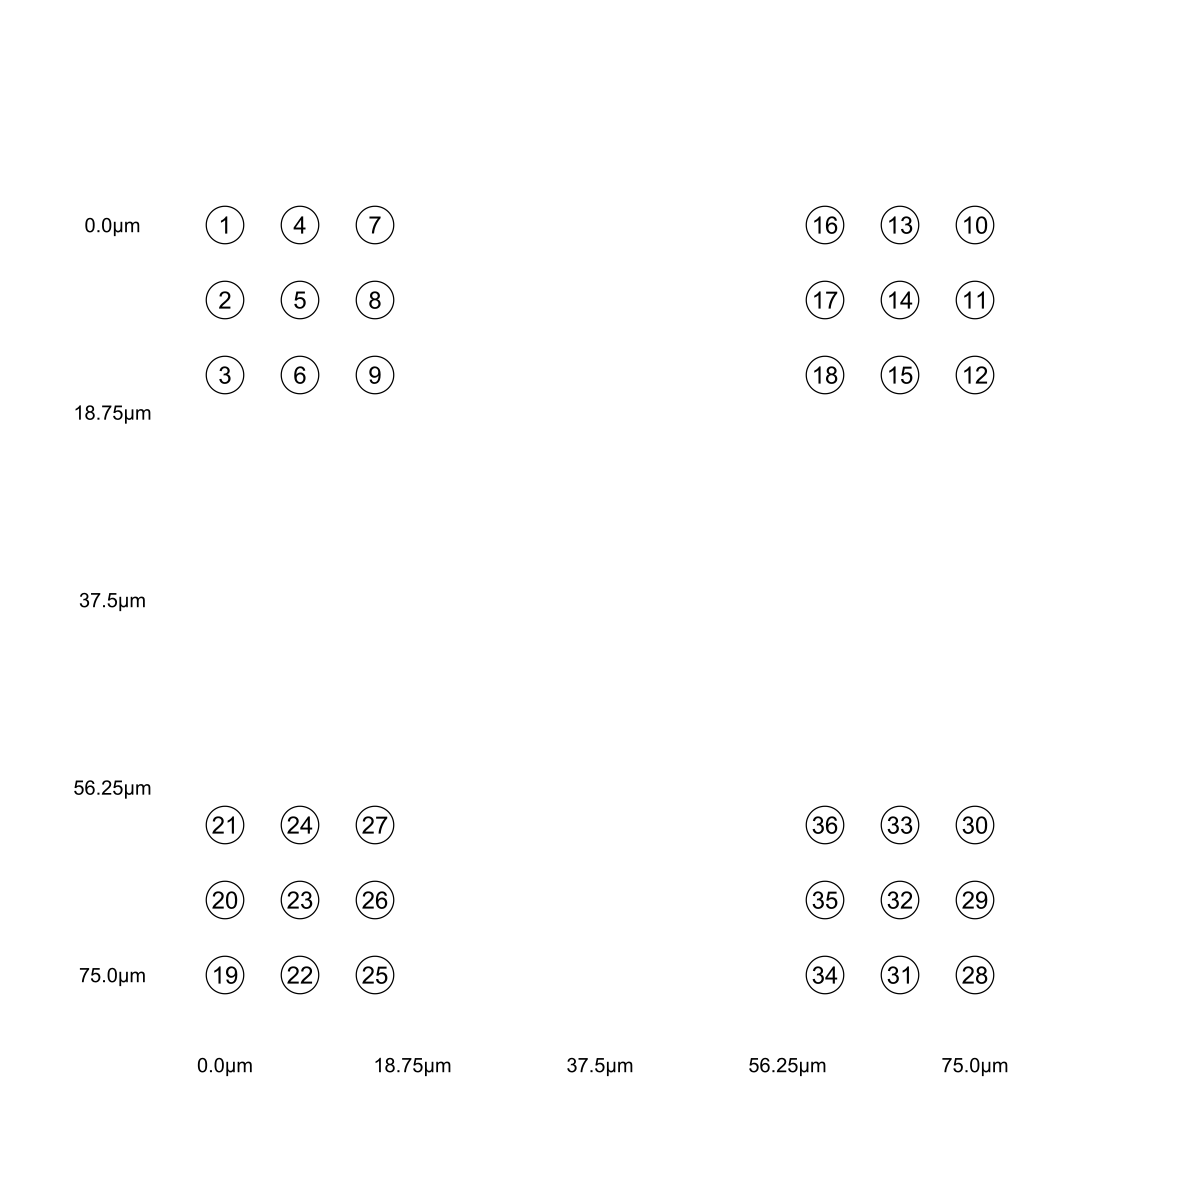

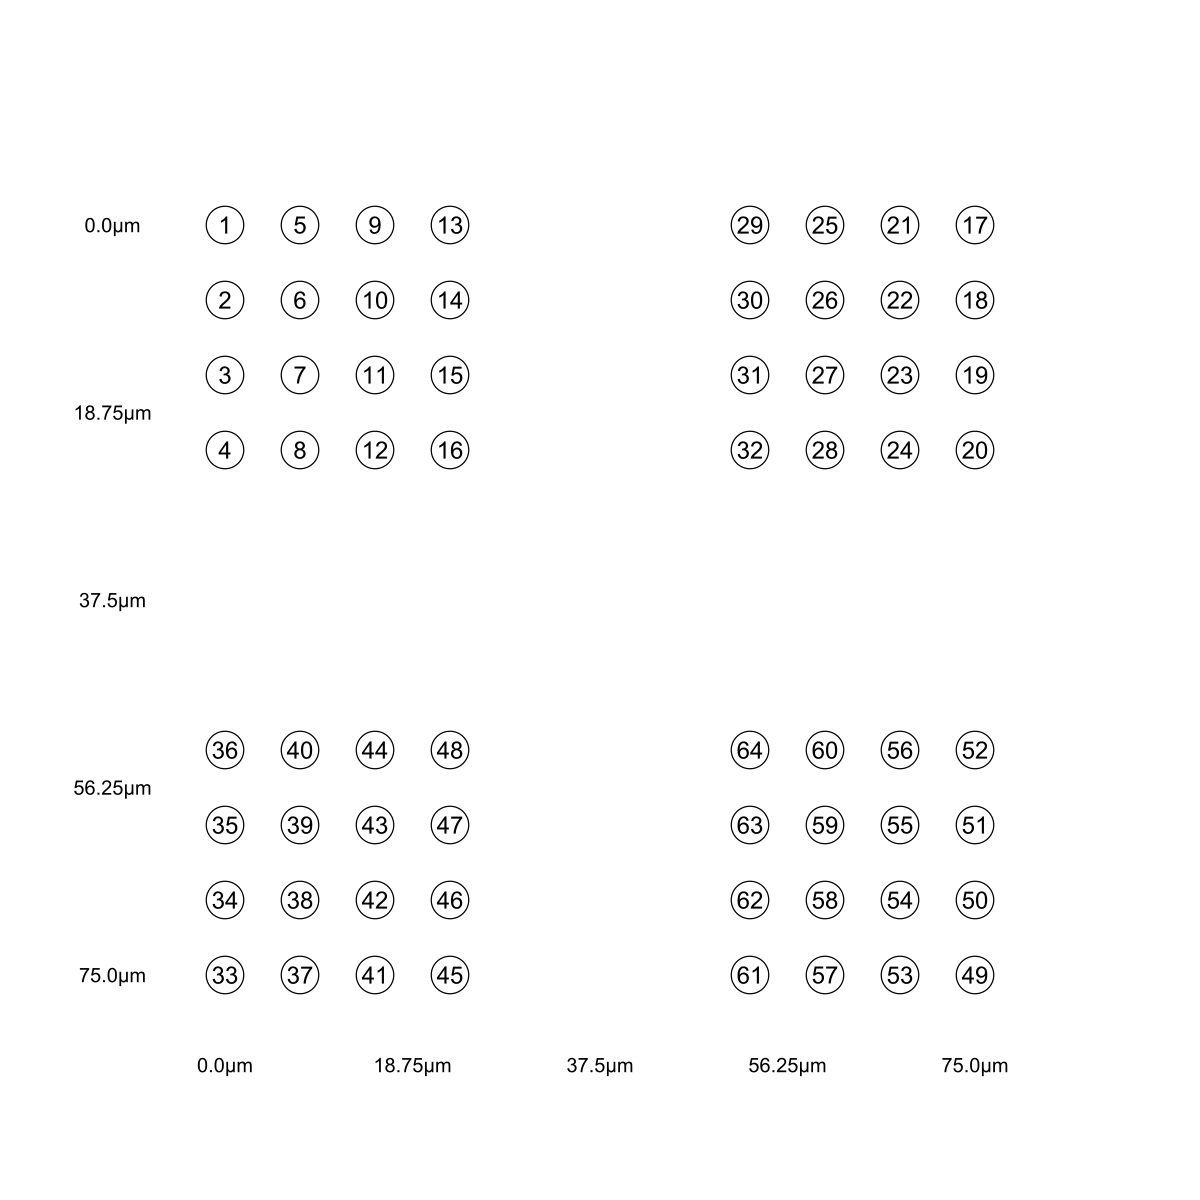

I ran QMC for these two atom configurations. For the 3x3 case, the most probable configurations looked as follows. Note that I reoriented the plots so that the top left atoms of the plot correspond to the top left atoms.

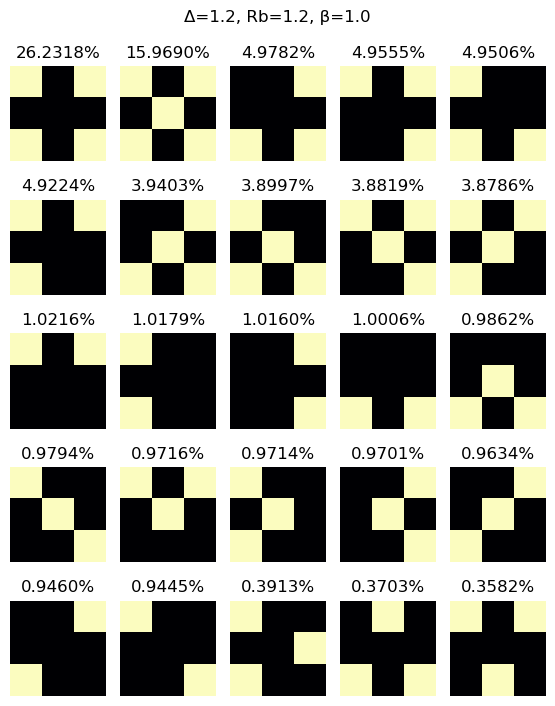
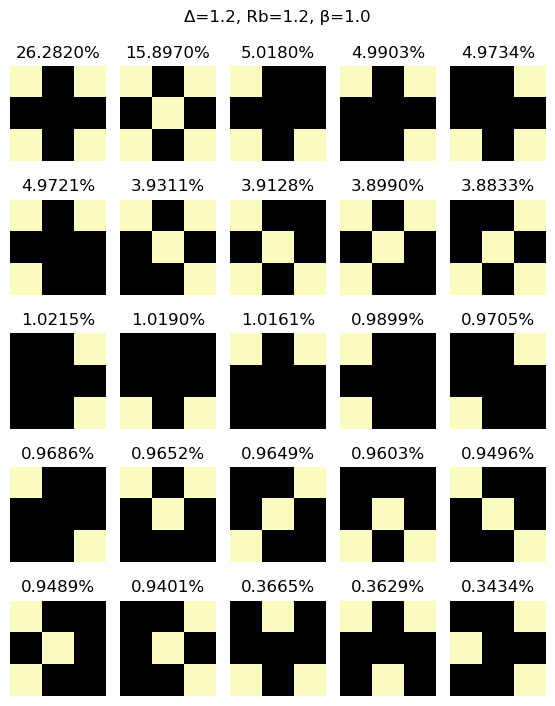
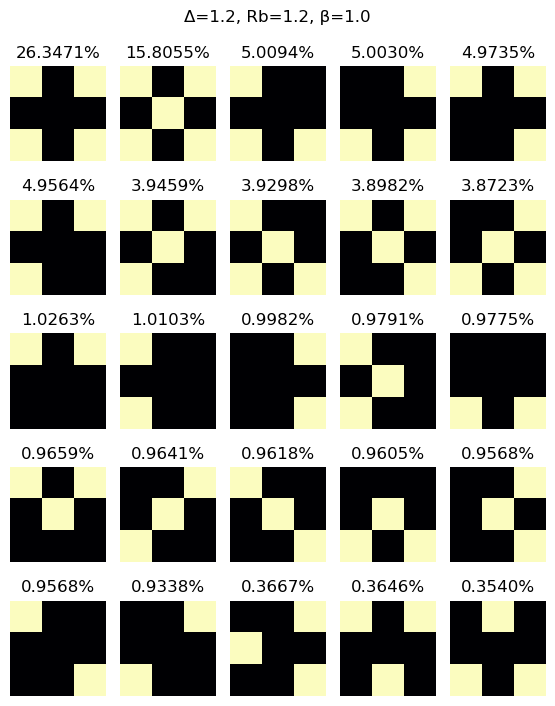
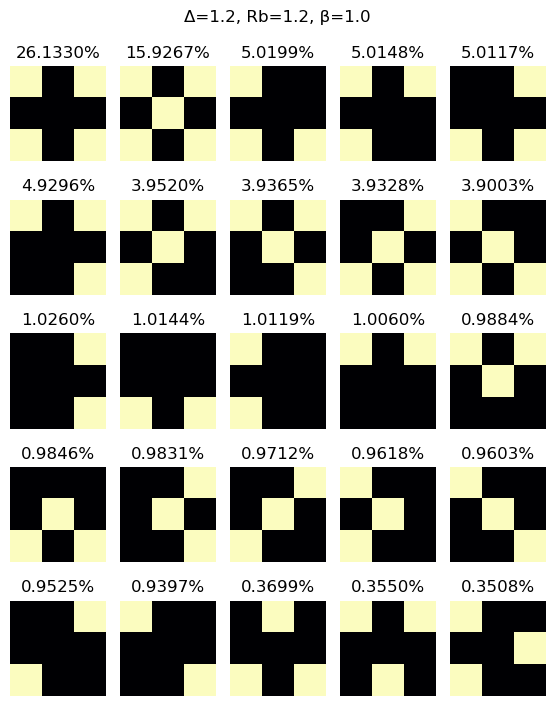

We note that there isn't any significant bias towards any specific side suggesting that the distance between the arrays is sufficient to have the arrays be independent. Any bias that might show up is masked by not having enough samples to precisely measure the exact probabilities. The observation applies for when the temperature is higher. When the temperature is higher, any biases are less noticeable due to more states being likely.

In the case of the 4x4 array, 

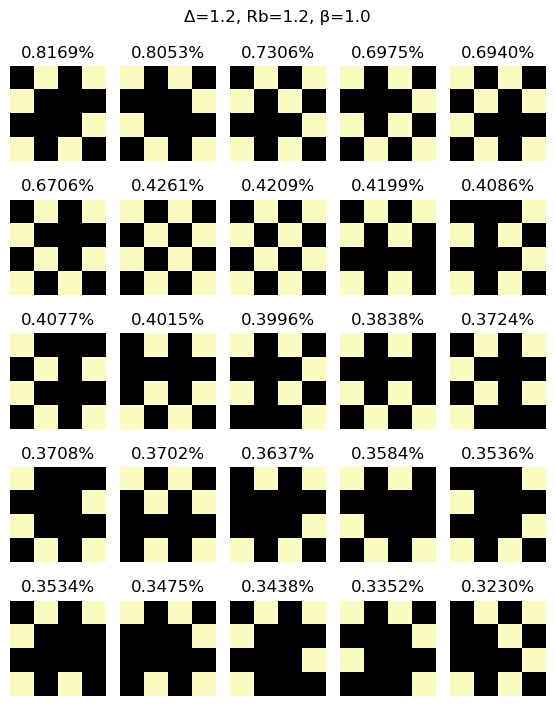
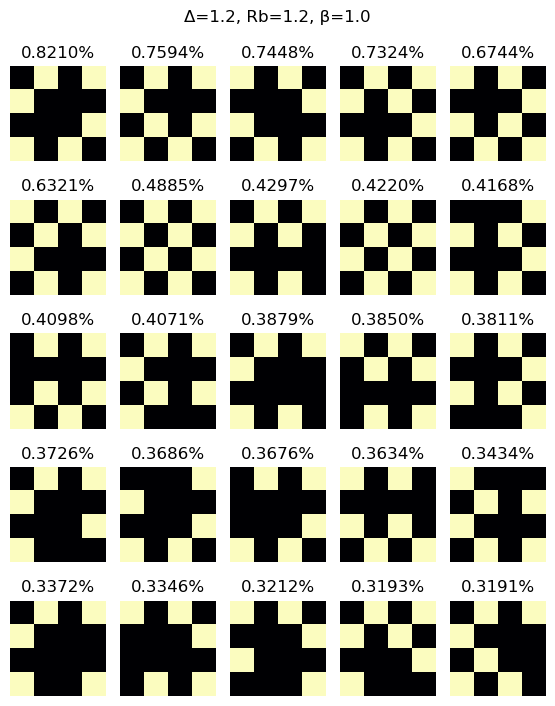
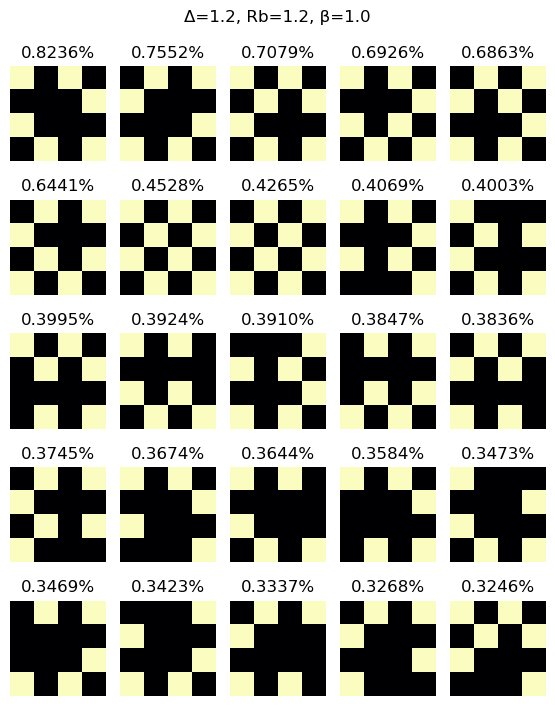
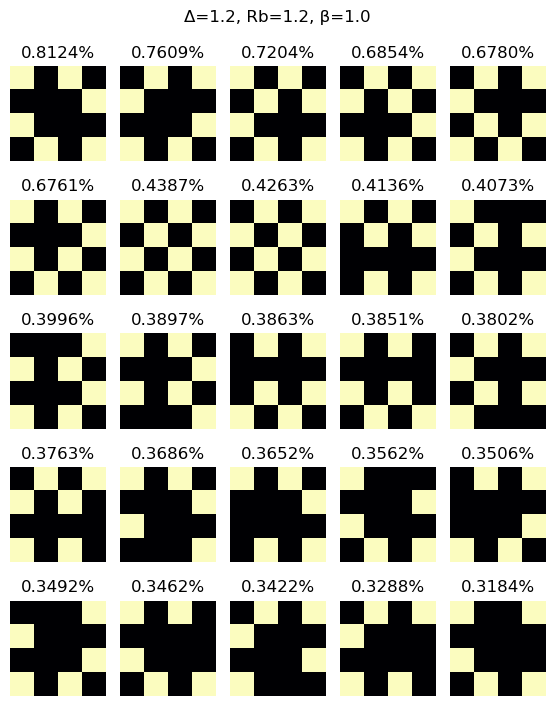

Similar to the 3x3 case, it seems like the bias is masked by the error generated by not sampling enough (here I sampled the four grids $10^6$ times)

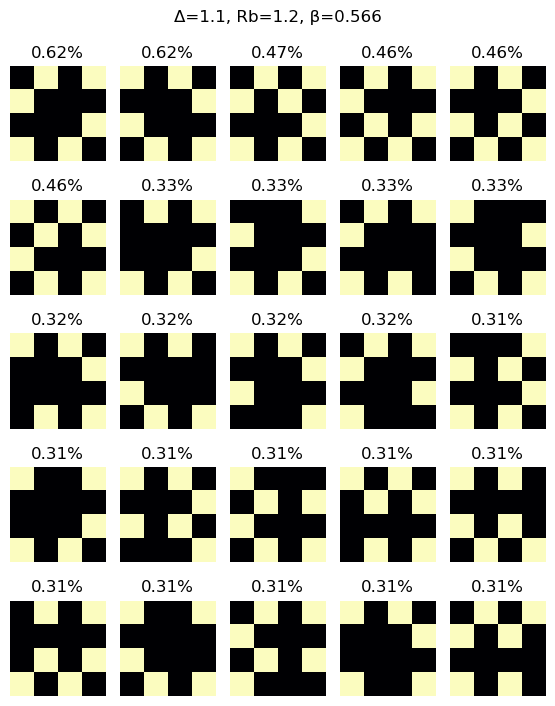

A more concrete way to visualize the independence of the 4x4 grids is by plotting the probability of measuring a qubit $a$ to be 1 given that another qubit $b$ is also 1. If the qubits $a$ and $b$ are adjacent, then the conditional probability should be low. And if they're far from each other, the conditional probability should the the same as the probability of just measuring 1. I wanted to do this calculation for points on different grids.

In particular, measurements of qubits $a$ and $b$ are independent if $P(a|b)=P(a)$. We know that there will only be a dependence if $a=1$ or $b=1$, so we will restrict our attention to that. For measuring $a=1$ to be independent of $b=1$, we want
$$\frac{P(a|b)}{P(a)}=\frac{P(a,b)}{P(a)P(b)}\approx 1$$
Thus we will plot
$$\log\left(\left|1-\frac{P(a=1|b=1)}{P(a=1)}\right|\right)$$

For the case where $a$ and $b$ are on the same grid, the plot will look like the following. For the $b=1$ in the obvious position, we are plotting the above quantity for all qubits $a$ on the grid. We notice in the plot, that when $a$ is farther away from $b$, that the log quantity decreases greatly as would be expected. When there is a two atom gap between $a$ and $b$, the dependence on each other vanishes. 

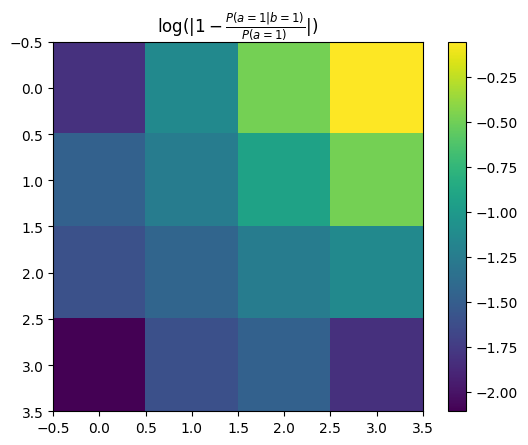

When $a$ and $b$ belong to different grids, but $b$ is on the edge of the first grid, we get the following. If any qubit depends on whether the qubit $b=1$, then for at least one qubit $a$, the log quantity should be reasonably large. However, we notice that there is no indication of where on the side of the grid $b$ is. Thus we conclude that none of the measurements in the nearby grid depend on the first grid.

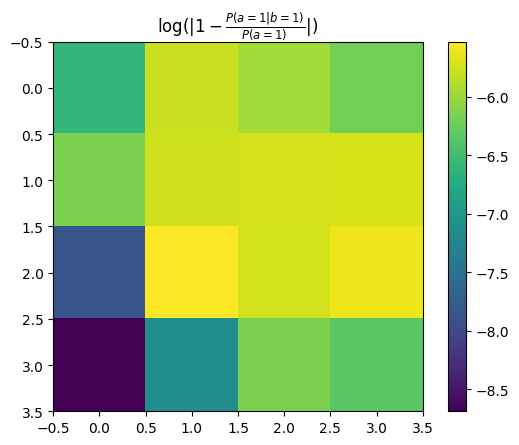


This calculation is mostly equivalent to the following calculation of correlation. This is because $P(a=1,b=1)=\langle n_i n_j\rangle$, $P(a=1)=\langle n_i\rangle$ and $P(b=1)=\langle n_j\rangle$.
$$g_{ij}=\langle n_i n_j\rangle-\langle n_i \rangle \langle n_j\rangle$$
or alternatively the correlation that ranges from -1 to 1.
$$\rho_{ij}=\frac{\langle n_i n_j\rangle-\langle n_i \rangle \langle n_j\rangle}{\sqrt{\langle n_i^2\rangle - \langle n_i\rangle^2}\sqrt{\langle n_j^2\rangle - \langle n_j\rangle^2}}$$

For $R_b/a=1.2$, $\delta/\Omega=1.1$, $\beta\Omega=12.72$ ($\Omega=4.24$) and $d_{\text{gap}}/R_b=2.199$, plotting the correlation of one point vs all points, gives the following plot. Note that each 4x4 grid on the corners corresponds to a 4x4 array of qubits.

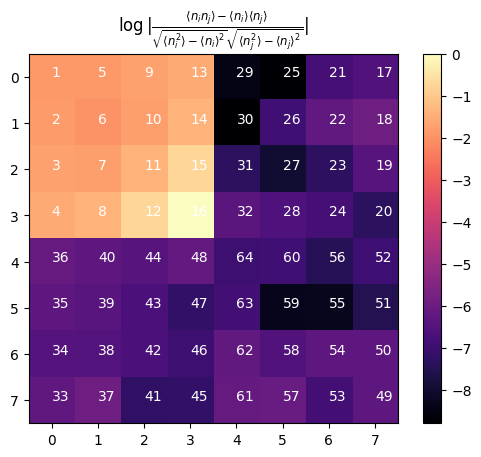

Or when not log scaled, 

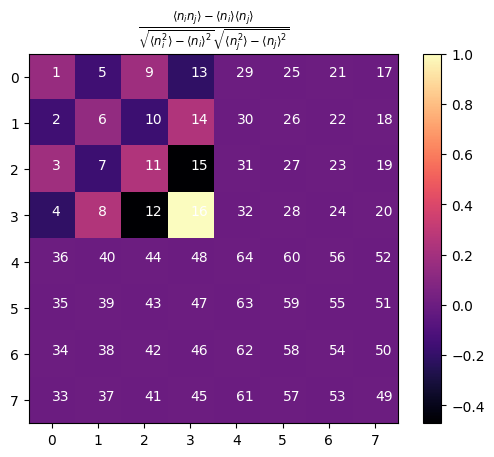 
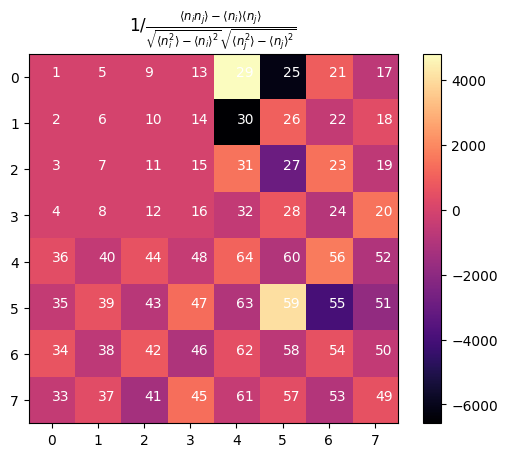

For $R_b/a=1.2$, $\delta/\Omega=1.2$, $\beta\Omega=0.251$ ($\Omega = 8\pi$) and $d_{\text{gap}}/R_b = 4.684$ 

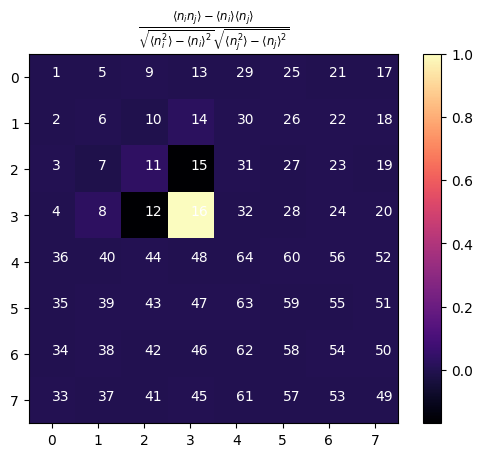
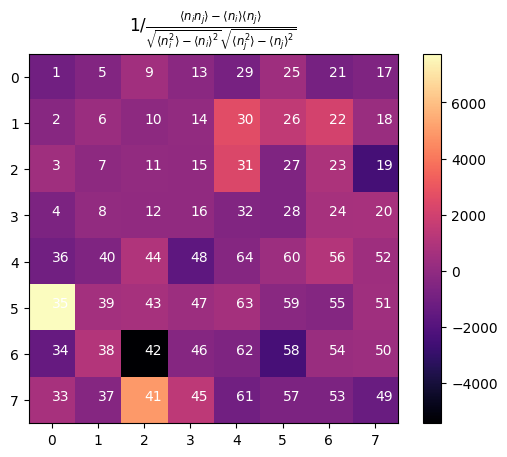

Changing $\beta\Omega$ to $25.13$.

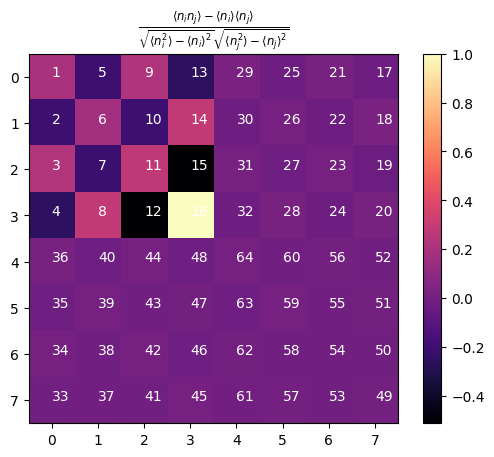 
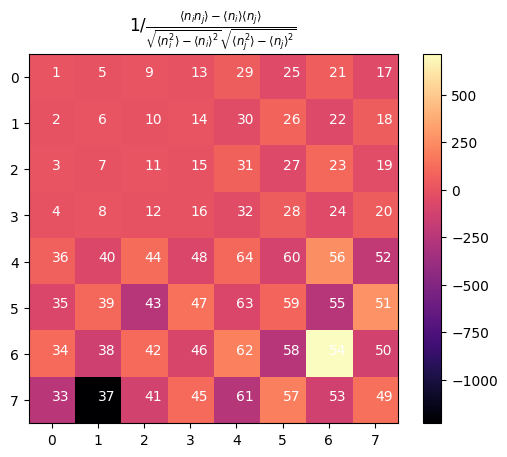

Here is the same kind of plot with the same tuning parameters except with a different qubit to compare with. Here we notice that the checkerboard pattern shifts to that the adjacent qubits (even on different arrays that should be independent).

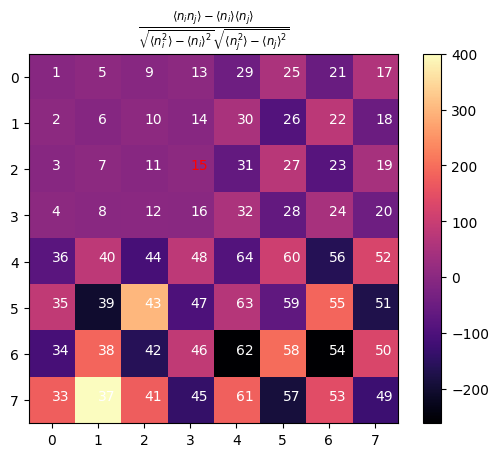

Changing $\beta\Omega$ to $\sim 12$.

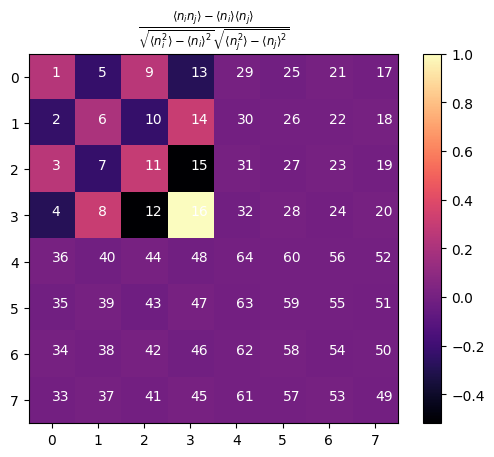
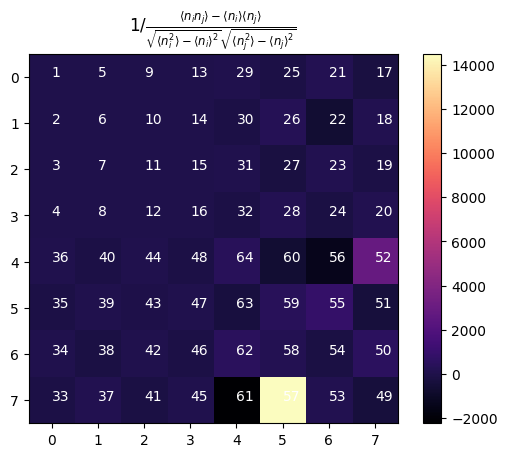

From this data, it seems like having a qubit being 1 has no impact on little impact on the most adjacent qubit on another array. However, it seems like when an qubit is 1, it tends to belong to a checkerboard pattern that is the same for all boards. Thus while a qubit being 1 doesn't cause adjacent qubits on other grids to be a 0, these are correlated, albeit only slightly. This is an annoyance with using a 4x4 array where there is a degenerate checkerboard pattern, where any slight perturbation can break the degeneracy causing an unintended correlation.

While there is correlation between qubits on different arrays, this doesn't necessarily imply that the distributions of each array are different from what they should be had there been a single array. What we care about is the correlations between qubits in a single array ($P(a|b)$), and we want to make sure that this value is not impacted by any qubits outside the array. To find this, I wanted to calculate $P(a|bc)/P(a|b)$ to see how close to $1$ is was.
$$\Delta_c g_{ab}=[P(ab|c) - P(a|c)P(b|c)] - [P(ab)-P(a)P(b)]$$


$$\frac{P(ab|c)}{P(ab)}=\frac{P(abc)}{P(ab)P(c)}=\frac{\langle n_i n_j n_k\rangle}{\langle n_i n_j\rangle \langle n_k\rangle}$$

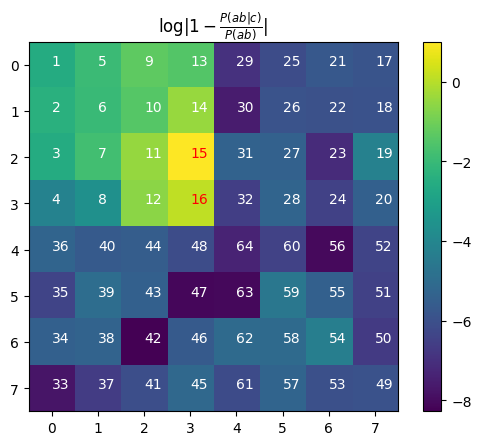

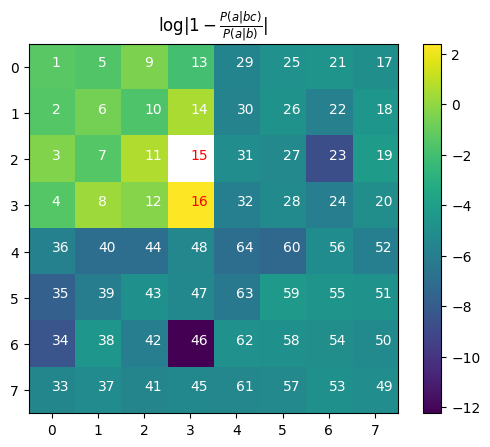
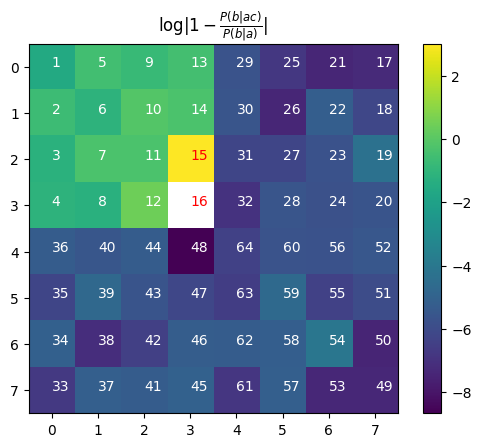

Thus once you calculate correlations between two qubits, they become independent of the qubits outside of the array. Or at the very least, the checkerboard correlation that showed up before vanishes (the same applies when the qubits we are calculating the correlation of are one distance further, both landing on the checkerboard). And this is for a high temperature of $\beta\Omega\approx 25$.


# Other 
Some important values of Acquila noise

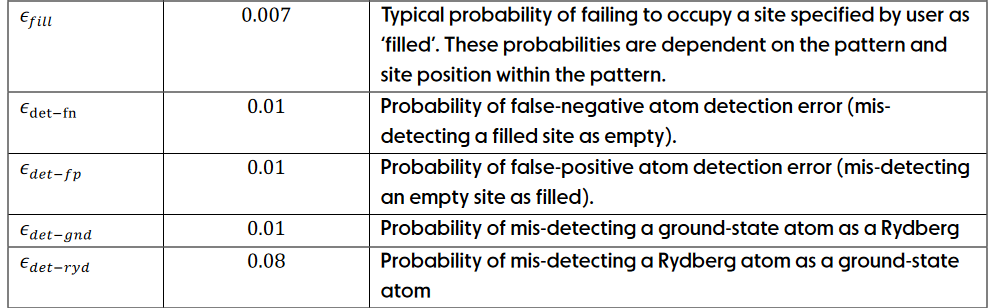

# Training transformer 

| Array shape | Embedding size | nhead | Full dataset |nlayers| 2d positional encoding| dim_feedforward | learning rate | Converged Loss  | Convergence iterations
| ----------- | -------------- | ----- | -------------|------|---------------------- | --------------- | --------------- | --------------- | ---------------------
| $(4,4)$     | 4              | 4     |        yes   | 5|        yes            | 2048            |0.001 | 0.4750-0.4820          | 3100 batches * 30
| $(4,4)$     | 8              | 8     | yes          |5| yes                   |  4000           |0.001|                 |
| $(4,4)$     | 4              | 4     |        yes   |5|        no            | 2048            |0.001|                 |
| $(4,4)$     | 4              | 4     |        yes   |5|        no            | 2048            | scheduler|                 |  
| $(4,4)$     | 3              | 3     |        yes   |5|        no            | 1024            | scheduler|                 |    
| $(4,4)$     | 4              | 4     |        yes   |8|        no            | 1024            | 0.001|                 |             

Each of these converged to approximately the same point.

## Finding the temperature using a transformer
With a transformer trained on a constant point in phase space with a constant array size, but varying temperature, I decided to test out the original idea of generating data with a transformer and comparing that to real data. Given a sequence of data, the transformer can output the conditional probabilities of measuring that result given all the previous results, and multiplying all these probabilities together, we get the probability of the state.

$$P(\sigma_1, \sigma_2, \cdots, \sigma_N|\beta) = P(\sigma_1|\beta)P(\sigma_2|\sigma_1, \beta)P(\sigma_3|\sigma_2,\sigma_1,\beta)\cdots P(\sigma_N|\sigma_{N-1}\cdots \sigma_1, \beta)$$
$$P(\sigma_1, \sigma_2, \cdots, \sigma_N|\beta) = \prod_{i=1}^N P(\sigma_i |\sigma_{<i}, \beta)$$
Since the transformer can output $P(\sigma_i |\sigma_{<i}, \beta)$ and $P(\sigma_1, \sigma_2, \cdots, \sigma_N|\beta)$, I wanted to take some data $\mathcal{D}=\{\mathbf{x}_i\}$ and calculate the probability of measuring that data given some $\beta$ value. In theory the $\beta$ value in which the probability is maximized will be the temperature of the data (or the closest to).

Mathematically this is

$$\log \prod_{\mathbf{x}\sim \mathcal{D}} p(\mathbf{x})= \sum_{\mathbf{x}\sim \mathcal{D}} \log p(\mathbf{x})=N \sum_i q(\mathbf{x}_i) \log p(\mathbf{x}_i)$$

which is maximized when the KL divergence is minimized.

To test how well this approach performed, I took some data with an unknown $\beta$ value and used the transformer to calculate the probability of measuring what was measured (or rather the log of the probability to reduce rounding error). I then varied the $\beta$ which I inputted into the transformer to see which $\beta$ value gave the highest probability for that batch. The below plot is the result of this, where the vertical line is the $\beta$ value of the dataset and the x axis is the $\beta$ values which were inputted into the transformer. From my results, it seemed as though it does not consistently give a good answer, since there often ends up being no maxima. Though some times, a somewhat accurate $\beta$ value is obtained.

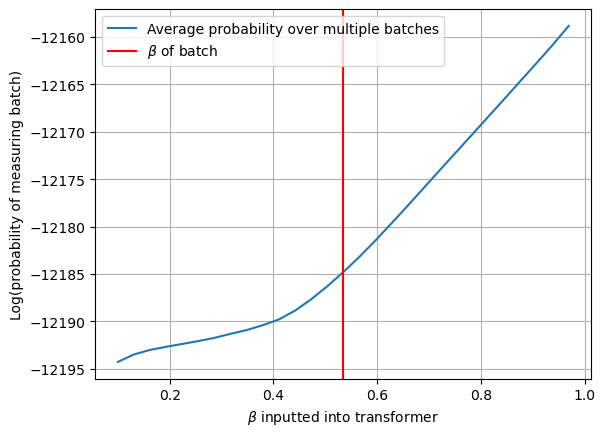
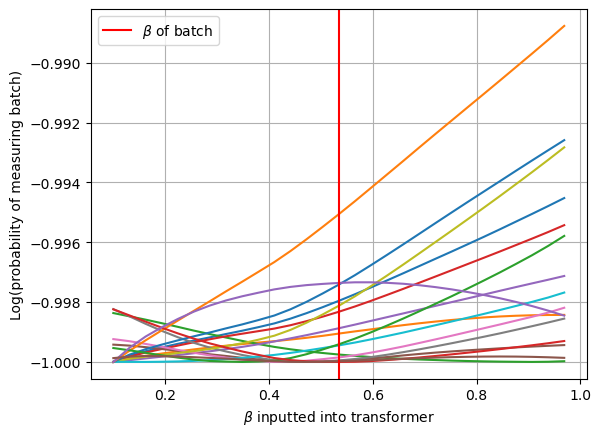

This can be done for more data to possibly obtain better results, though it's quite possible that it won't since the above results are quite similar to what is seen with a smaller dataset. However, the transformer takes a while to perform a lot of computations (without a gpu), simificantly longer than computing a histogram with real data and performing KL divergence on the probabilities. I will do further analysis on why this wouldn't work with this trained transformer later.

The corresponding plot with real data is what was done way earlier. A large amount of data is required, and the same applies for the transformer.

A way to compare the accuracy of the probability which the transformer outputs, is to compare it with what it should be for that configuration (at some $\beta$). In the figure below, for each configuration that appeared in the dataset, I plotted the output probability of the transformer against the probability calculated from the data.

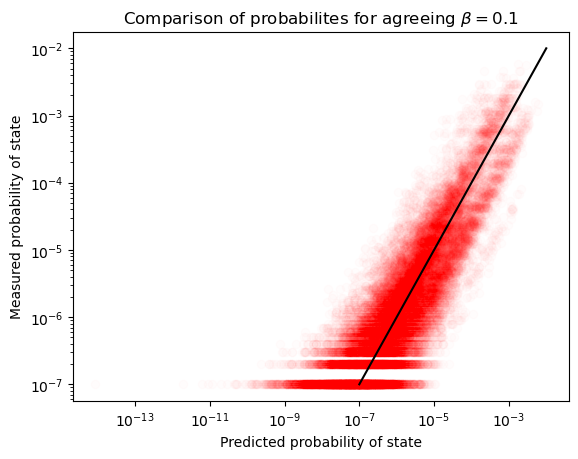

We notice that for any true probability, the transformer will output a probability that is within an order of 1 or 2 orders of magnitude from it. There is definitely a correlation, but it is very noisy. In the ideal case, these are perfectly correlated and we can use the transformer to exactly calculate the probilities, which we could then apply to larger datasets where the probabilities can't be calculated due to insufficient data. But with this trained model, this cannot be done accurately.

Another thing I noticed about the transformer is that is isn't as expressive about the temperature as it should. The probability for different states should change greatly when you greatly change the temperature, but the transformer doesn't reflect this. 

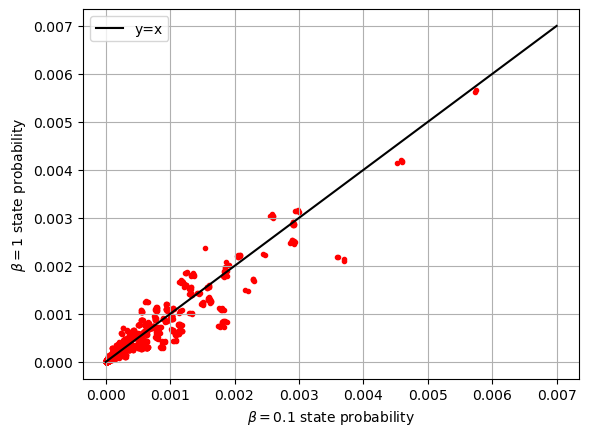

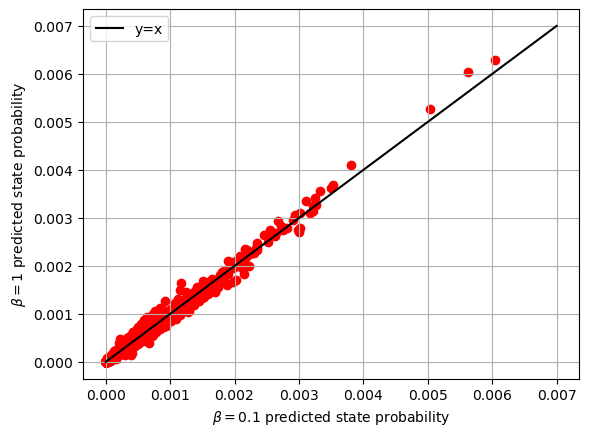

# Calculating energy of transformer
With the transformer, you can calculate the energy using the following formula
$$\langle E \rangle = \langle \psi \vert \mathcal{H} \vert\psi\rangle = \sum_{z,z'} \psi(z)\psi(z')\mathcal{H}_{z,z'}$$
$$=\sum_z |\psi(z)|^2\sum_{z'} \frac{\psi(z')}{\psi(z)}\mathcal{H}_{z,z'}$$
$$\mathcal{H}=\frac{\Omega}{2}\sum_i \sigma^x - \delta \sum_i n_i +\sum_{i<j} V_{ij} n_i n_j$$
$$\mathcal{H}_{z,z'}=\langle z \vert\mathcal{H}\vert z'\rangle=\Bigg\{
    \begin{array}{lr}
        \frac{\Omega}{2} & \text{if } |z'\rangle=\sigma^x|z\rangle\\
        -\delta \sum_i n_i +\sum_{i<j} V_{ij} n_i n_j & \text{if } z= z' \\
        0 & \text{otherwise}
    \end{array}
$$
$$\frac{C}{R_b^6}=\Omega$$
$$V_{ij}=\frac{C}{|\mathbf{x}_i-\mathbf{x}_j|^6}=\frac{C}{a^6}\frac{1}{|\mathbf{q}_i-\mathbf{q}_j|^6}=\left(\frac{R_b}{a}\right)^6\Omega\frac{1}{|\mathbf{q}_i-\mathbf{q}_j|^6}$$
$$\frac{V}{\Omega}=\left(\frac{R_b}{a}\right)^6$$

What I want to test out is how the energy computed from the transformer compares with the energy computed with the QMC data compares with the exact energy. The exact energy can be computed with exact diagonalization (using Krylov to find eigenvalues), which is the same as what the QMC outputs when it computes $\langle E\rangle=-\langle n\rangle/\beta$. 

The energy computed with QMC data will be compute by finding the probability of each configuration (all $2^{16}$ of them) calculated from counting the QMC samples. Then we can compute the expectation value of the energy using the above formula. This also has the form $\mathbf{x}^\top H \mathbf{x}$, where $\mathbf{x}=\sqrt{\mathbf{p}}$ computed element-wise, where $\mathbf{p}$ is the vector of configuration probabilities.

To compute the expectation value of the energy for the transformer, all configuration probabilities will be found by multiplying the conditional probabilities outputted by the transformer, and the same process as above will be used to compute energy. Ideally, all approaches will yield the same correct result.

In practice


|$R_b/a$|$\Delta/\Omega$ |$\beta$| Transformer energy | QMC data energy | exact energy |
| ----- | -------------- | ----- | ------------------ | --------------- | ------------ |
| 1.2   | 1.1            | 0.1   |   -209.80442  |    -223.3233   | -204.502
| 1.2   | 1.1            | 0.19310| -209.797         |    -224.3098      |-219.83 
| 1.2   | 1.1            | 0.2   |  -209.7964        |         |     |
| 1.2   | 1.1            | 1| -209.3624         |    -224.5436     |-224.851
| 1.2   | 1.1            | 9.5789   |   -175.39562988   |    -224.5344   | -224.923

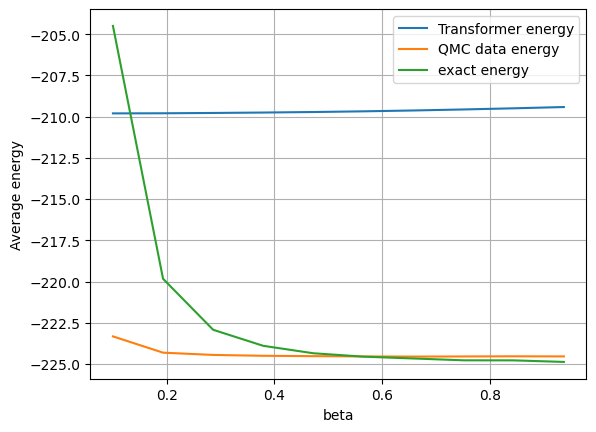

For 10,000,000 data points

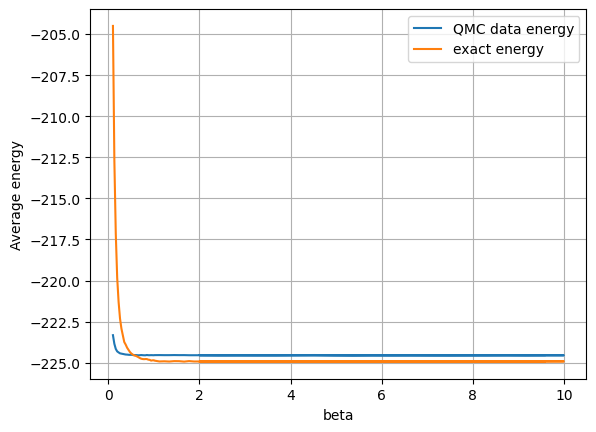

For 1,000,000 data points

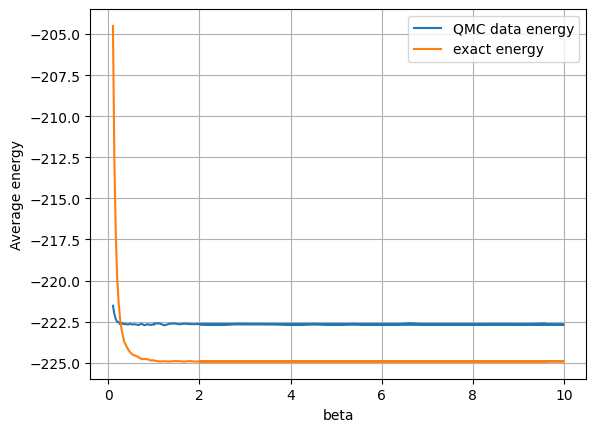

For a single point in phase space (in this case, on the critical point) with a known $\Omega$ and array size (in this case 4x4), we can plot the $\langle E\rangle$ vs $\beta$. Doing so yields the following plot. This is different from previous plots since it spans over the entire range of $\beta$ values (which are interesting). This plot is informative for finding which $\beta$ values should be trained if we're assessing transformers based on the energy they output.

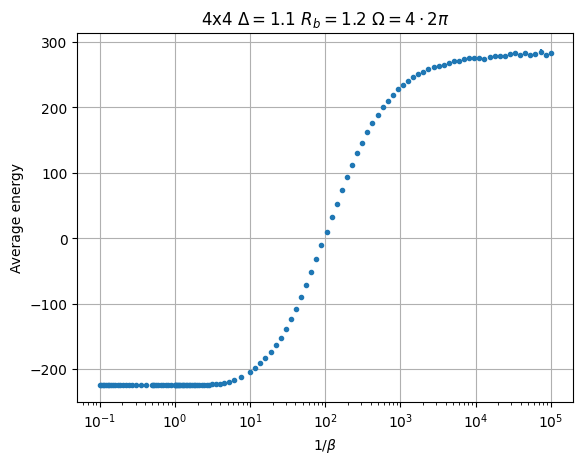

All of the previous analysis has been done with $\beta$ values near the left of the plot, but there is a lot happening everywhere else. For this set of parameters, there are things happening from $\beta=0.5$ to $\beta=10^{-5}$.

The above plot depends on both the number of atoms and $\Omega$. To remove the dependence, we instead plot $\frac{\langle E\rangle}{N\Omega}$ vs $\frac{1}{\beta \Omega}$. This is because $\mathcal{H}$ has units of frequency since $\hbar=1$. As well since, $\beta E$ is used as a dimensionless quantity and $E$ has units of frequency, $\beta$ has units of inverse frequency. The $N$ in the denominator of $\frac{\langle E\rangle}{N\Omega}$ gives the energy per atom, which would make energies much more comparable between array sizes. I plotted data generated from two different values of $\Omega$ to show that its value doesn't matter.

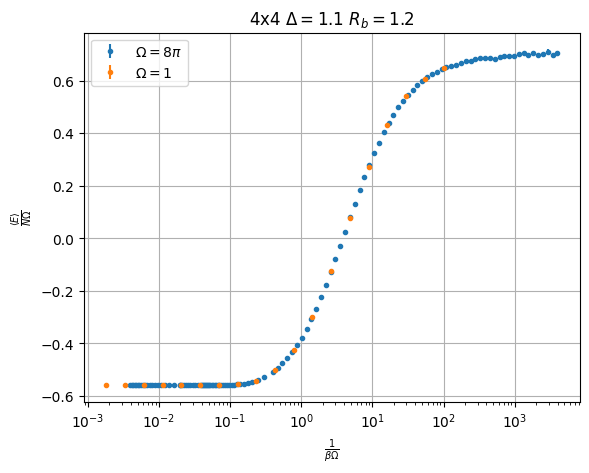



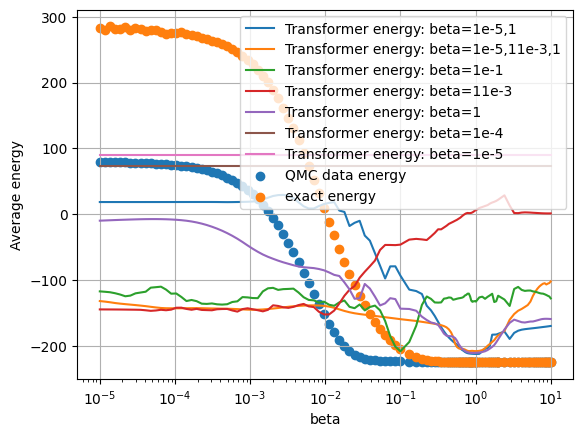

# Analysis on real data
-209.28598022,    0.        , -204.502  0.1
-203.91567993,    0.        , -224.851  1

Since we don't have enough Acquila data collected by Anna Knorr, by best bet is to use the average occupation to estimate $\beta$. Doing this results in the folling plot.

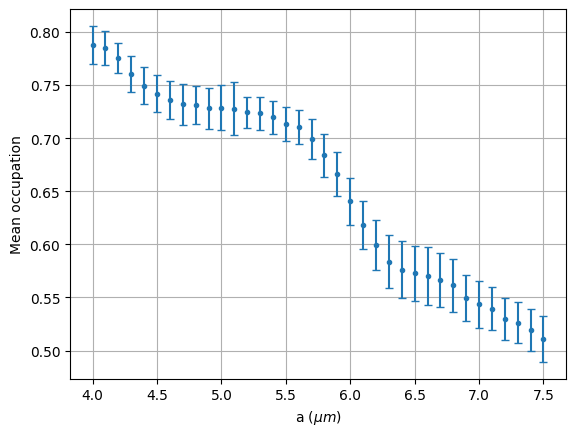

We notice here that the occupation changes dramatically with the interatomic distance. We also notice that there are quite large errorbars due to the small amount of data (200). This will make estimating the temperature almost impossible.

This is the plot of QMC data relating the average occupation to the temperature. We can tell that, similar to before, the temperature is very sensitive to the average occupation though it does affect it. This is when $a=7.6136534 \mu m$, quite close to the far right point on the above plot.

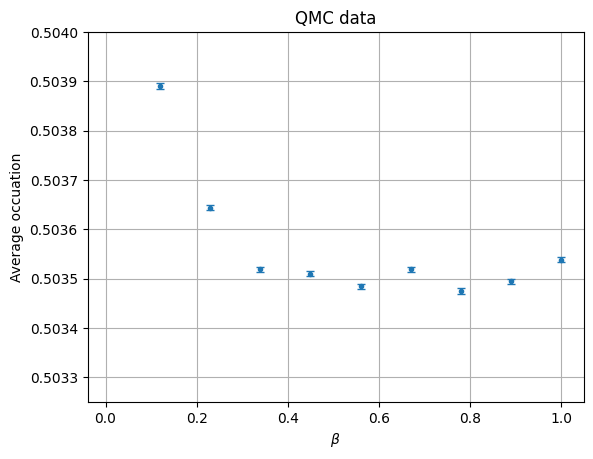

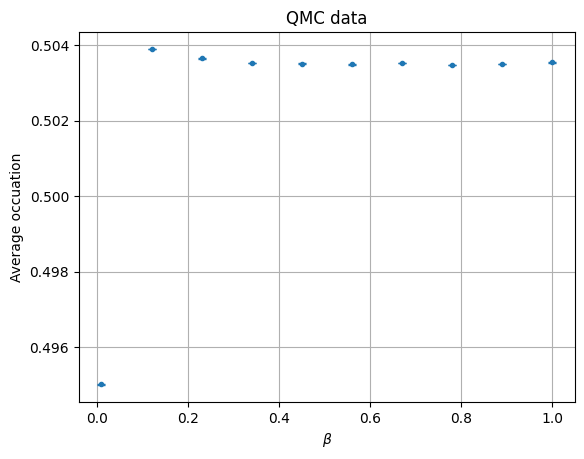

For whatever reason the data point at $\beta=0.01$ is very far from what would be expected based on the higher $\beta$ values. One would expect the average occupation to increase when the temperature increases, but this was not the case. This makes me think some error took place here.

Stuff to look into
* difference between energies
* calculating energy for transformer
* how to improve transformer accuracy
* cause of deceased average occupation for low beta values in checkerboard phase
* cause of average occupation dependence in sweeping rate
* 

# Acquila

$\Omega$ cannot have a value larger than $15.8$. It will not lead to a validation error, but if the value is larger, $\Omega$ will be set to $15.8$. This is important to make note of since this will lead task being in a different point on the phase space than intended.

$\Omega$ is also allowed to be any value since it won't impact the overall physics. The energy is consistent if you calculate $E/\Omega$, the transitions in temperature are consistent if you calculate $\beta\Omega$, and the transitions on the phase space are only dependent on $R_b/a$ and $\Delta/\Omega$. All changing $\Omega$ will practically do is change $a$, meaning that the arrays can fill a smaller section of the field of view. This is helpful for keeping the 4x4 atom arrays on each corner as far from each other as possible to ensure no correlations.

|$R_b/a$|$\Delta/\Omega$ | $\Omega$ | Shots | Tasks | Type               | Cost (CAD)
| ----- | -------------- | --------- | ---- | ------ | ----------------- | ----
| 1.15   | 1.2            | 15.8     | 1000 | 102     | 4x4 on four corners | 1050.60


After running this code for an already setup register (making sure credentials are setup), 
``` python

import numpy as np
import matplotlib.pyplot as plt
from braket.ahs.atom_arrangement import AtomArrangement
from quera_ahs_utils.plotting import show_register
from braket.ahs.hamiltonian import Hamiltonian

C = 2*np.pi * 862690
omega = 15.8 # caps out at 15.8
delta_per_omega = 1.2
Rb_per_a = 1.15 # 1.05 or 1.15 or 1.3
nx = ny = 4
Lx = 75
Ly = 76


Rb = abs(C/omega)**(1/6)
a = Rb/Rb_per_a
delta = abs(omega)*delta_per_omega

assert a >= 4, a
assert omega <= 15.8, omega

# making an arrangment of 4x4 atom arrays at corners of FOV
register = AtomArrangement()
for (xcorner, ycorner) in [(0,0), (Lx, 0), (0, Ly), (Lx, Ly)]:
    for ax in range(nx):
        for ay in range(ny):
            register.add([abs(xcorner - ax*a)*1e-6, abs(ycorner - ay*a)*1e-6])
fig = show_register(register)

from quera_ahs_utils.plotting import show_global_drive
from quera_ahs_utils.drive import get_drive

omega_min = 0
omega_max = omega*1e6 # 4.24 MHz
detuning_min = -delta*1e6
detuning_max = delta*1e6

time_max = 3e-6
time_ramp = 2.5/30*time_max

time_points = [0, time_ramp, time_max - time_ramp, time_max]
omega_values = [omega_min, omega_max, omega_max, omega_min]
detuning_values = [detuning_min, detuning_min, detuning_max, detuning_max]
phase_values = [0,0,0,0]


drive =  get_drive(time_points, omega_values, detuning_values, phase_values)
H = Hamiltonian()
H += drive

from boto3 import Session
from braket.aws import AwsDevice, AwsSession
from braket.ahs.analog_hamiltonian_simulation import AnalogHamiltonianSimulation

ahs_program = AnalogHamiltonianSimulation(
    register=register,
    hamiltonian=H,
)
boto_session = Session(
    region_name="us-east-1")
aws_session = AwsSession(boto_session)

aquila = AwsDevice("arn:aws:braket:us-east-1::device/qpu/quera/Aquila", aws_session)
discretized_ahs_program = ahs_program.discretize(aquila)

nshots = 1000
task = aquila.run(discretized_ahs_program, shots=nshots)
```
I only ran a single task (with the maximum number of shots, 1000), and I get a display on AWS. Right now, this task is only queued because Aquila is currently offline, but once Aquila comes online, the task will be run and the results will be saved to s3.

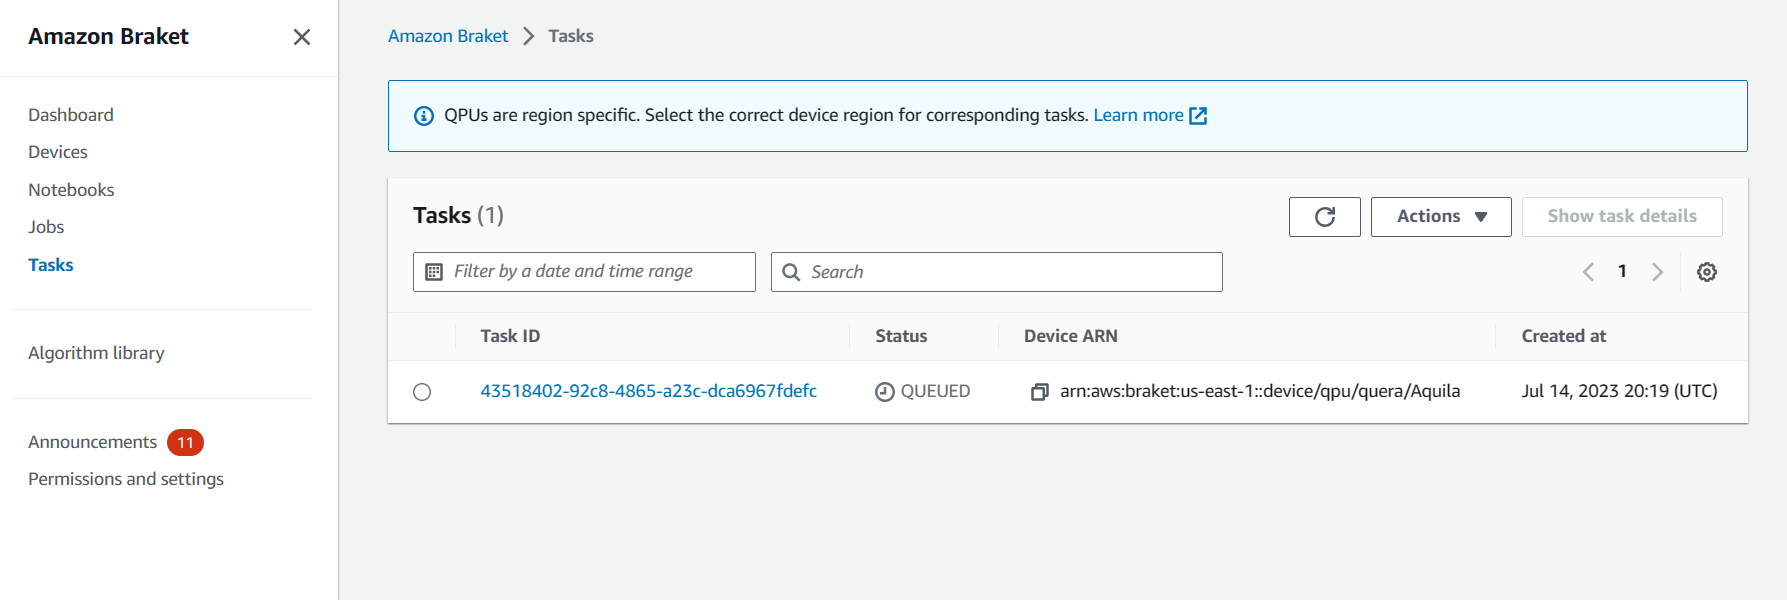

This task is taking forever to actually execute. After three days of Quera being online, the task has not been run. This lead to the task not being run for 10 days. It may be possible to use a job to move ahead in the queue, however this will cost more and lead to less data being collected.

After three weeks, I obtained the results

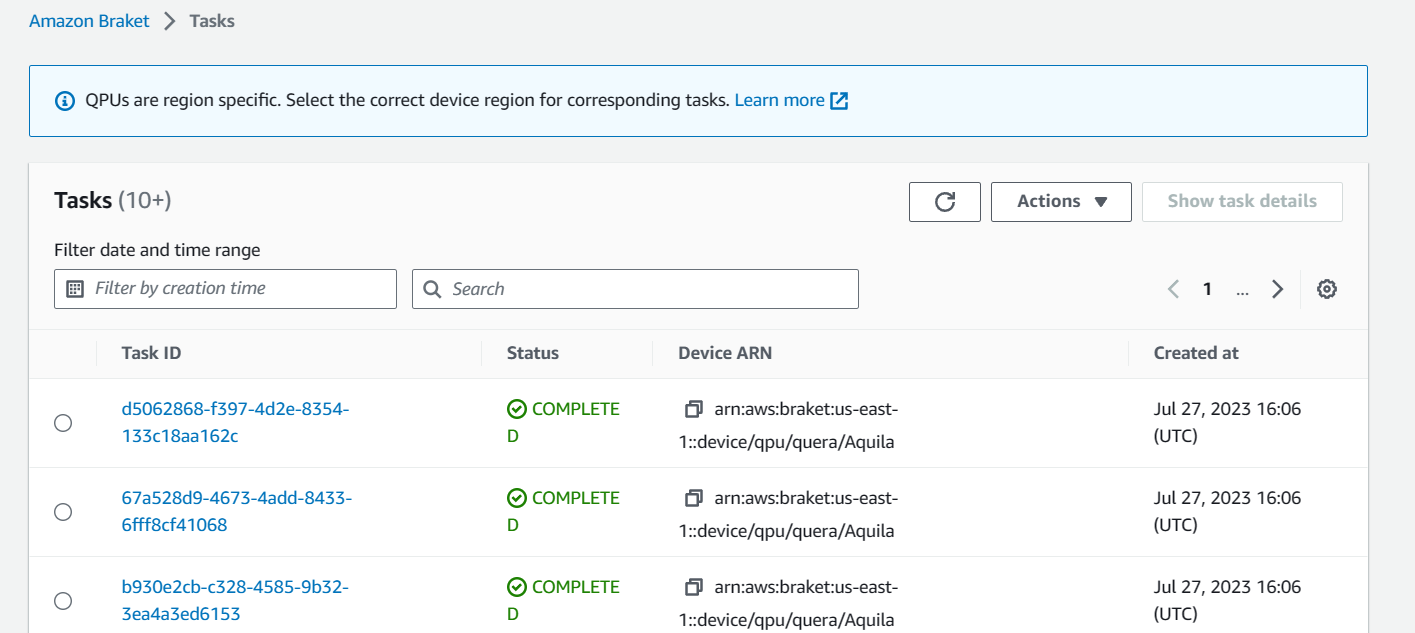

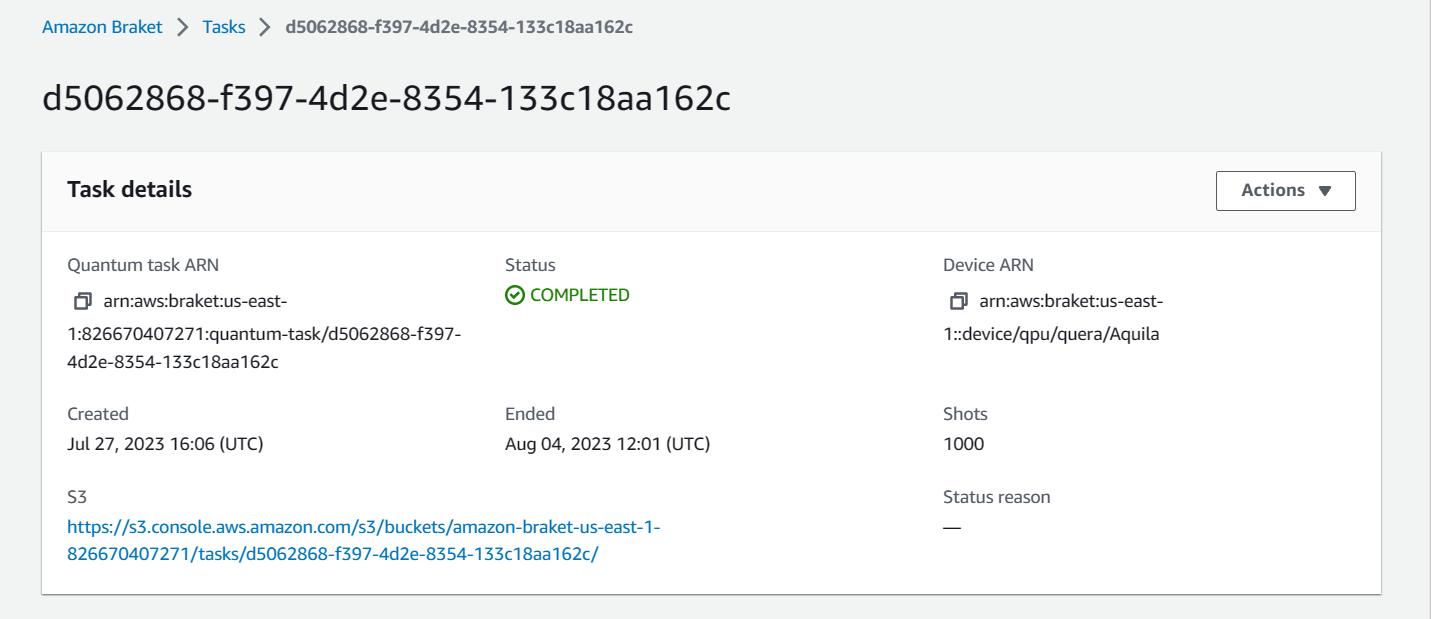

And the data could be found in s3, under the bucket `amazon-braket-us-east-1-826670407271` and the folders `tasks/04be0d02-e4ba-4657-ba9d-a20f9bc76b71/results.json`, where the folder name corresponds to the task. Each `results.json` is a json file with 1000 shots and metadata to allow you to reproduce the experiment.

# Using an RNN to train on limited quantum computer data
I have acces to Schuyler's quantum computer data, in which the Harvard experimentalists varied the sweeping rate (anealing time). What we want to figure out with this data is what the sweeping rate should be in order for the resulting state to be as close to the ground state as possible (or make the ground state as likely as possible). According to theory, the transition probability from the ground state to an excited state is proportional to the inverse square of the energy difference between the states. If we were to start our qubits as all 0s, which is the ground state when $\Delta$ is negative, and we were to continuously shift our Hamiltonian by increasing $\Delta/\Omega$ (which corresponds to going right in the phase diagram), we would eventually cross the phase transition. At this phase transition, the ground state and excited state will cross and the probability for staying in the ground state will decrease. So we wouldn't expect the state in the checkerboard pattern phase to be in the ground state. However, this only applies when the system is infinite. For finite systems, Hamiltonian is gapped and the ground state and first excited states will stay some distance from each other. This means that for finite systems, we can somewhat expect the resulting state to be accurate, though maybe less accurate for larger system sizes.

If the sweeping rate is too large, the probability of transition will increase. So we want to find a sweeping rate in which this probabilty goes to zero, or at least has mostly converged. The question then arises, how do we find this sweeping rate in which the state transition is adiabatic? 

One method would be to use what we have done before, and compute how the temperature has converged. Since this approach requires too much data to get reasonable error bars, we could instead calculate the average occupation. The average occupation can then be related to the temperature which can be related to the average energy. Each sweeping rate would have its own average occupation, and we can see if the average occupation has converged. We have done this approach already, but we wish to use a different independent approach to test the accuracy. If both approaches yield the same kind of results, we can be quite confident that the results are accurate. 

In addition to computing the average occupation, we could also calculate the average energy from the data. It should also be noted that with just a small amount of data, we cannot get even close to an accurate energy (accurate being the corresponding QMC energy), thus we will want a different approach to test this.

An approach to see how the energy has converged to use a neural network to train on this limited data and compute its energy. Here we could either use an RNN or a transformer, since they are both universal approximators of a quantum state. However, I will opt to use an RNN because it is faster to train. We will then train a series of transformers each sweeping rate and see how the energies of the transformers converge. We will also want to make sure that if a neural network was trained multiple times independently (different seeds), that the converged energy will not have too large error bars.

My first attempt at this was to use Mohamed Hibet Allah's tensorflow 2D RNN VMC [code](https://github.com/mhibatallah/RNNWavefunctions) and convert it to be able to use real data. However, his code was built to use TFIM rather than the Ryberg Hamiltonian. I ended up deciding to use a different [codebase](https://github.com/GTorlai/NeuralNetworks-for-Quantum/blob/main/src/2_VMC_Rydberg.ipynb) which was built to use the Rydberg Hamiltonian but was not a 2D RNN. 

I was able to get this to work and I tested it out with the gpu google collab. But this codebase was built with tensorflow, and I was having a lot of problems getting tensorflow to work on the cluster. I could get a simple tensorflow program to work, but for my large script, which worked on google collab, it raised an error like this (repeated for 1700 lines):
```
2023-07-27 08:49:18.561154: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-27 08:49:18.563493: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-27 08:49:18.565469: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_1_grad/concat/split_1/split_dim' with dtype int32
```
I instead opted to convert the code to PyTorch and to attempt to make a more generalized codebase which I could use for my experiments. In this codebase, I want
* Ability to use multiple models: [torchscale RetNet](https://github.com/microsoft/torchscale/tree/main), transformer, rnn (maybe a 2D rnn but 1d is probably fine)
* Ability to do VMC, train on data, and to calculate energy while training on data
* Be able to transition from VMC to data training and back at will for a single model.

With this I will do the following experiments
1. Using Schuyler's data, for each sweeping rate, train a model and calculate the energy at each iteration. See if the converged neural network energies change in an understandable way when varying the sweeping rate
2. See how swapping between vmc and training affect qmc training (for non ground state)
3. Experiment on performance different between the three models
4. Alternate between vmc and data on schuyler data to see it's affect on convergence
<!-- To start, I will be modifying Mohamed Hibet Allah's tensorflow 2D RNN VMC code to allow it to train on real data. His VMC loss function is as follows:
$$\mathcal{L} =\frac{1}{N_{\text{samples}}}\sum_{x\sim \mathcal{D}}\log{P(x)}E_{\text{loc}}(x)-\frac{1}{N_\text{samples}^2}\left(\sum_{x\sim \mathcal{D}}E_{\text{loc}}(x)\right)\left(\sum_{x\sim \mathcal{D}}\log{P(x)}\right)$$
$$ \langle E\rangle =\sum_{x\in \mathbb{Z}_2^N}P(x)E_{\text{loc}}(x)\approx \frac{1}{N_{\text{samples}}}\sum_{x\sim \mathcal{D}}E_{\text{loc}}(x)$$
 -->


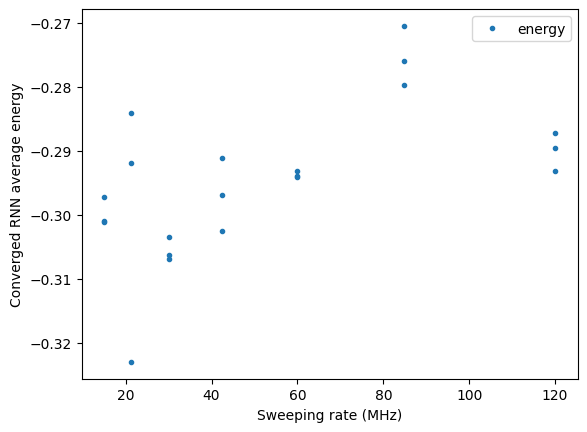
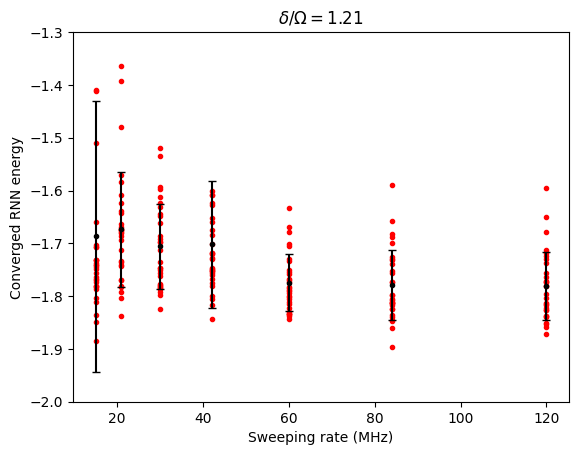

## More experiments
I tried to reproduce Schuyler's results, here are some results I found:
* RNN takes a while to reach the ground state without the help of QMC. It will start with positive energy and take a while to decrease
* After QMC, RNN starts with a relatively good energy to start with and gets to the ground state much quicker. This agrees with Schuyler's results.
* RNN only takes a while for larger system sizes, such as 16x16. On 4x4, RNN reaches the right energy quite quickly. 
* RetNet reaches the ground state much faster than RNN without the help of QMC. I can get to the right energy range within 4 vmc steps.
* My VMC program takes a while to converge on the true ground state energy, or simply struggles to get too close.

Here is a plot of training the RetNet with VMC. For whatever reason, the energy approaches the ground state but then increases before decreasing again. This Hamiltonian was one that I generated with QMC, so I know the exact energy of it. The temperature of it was chosen to be quite low, so the energy will be very close to the actual ground state energy. You can notice in the plot that the energy doesn't seem to asymptotically approach the ground state energy.

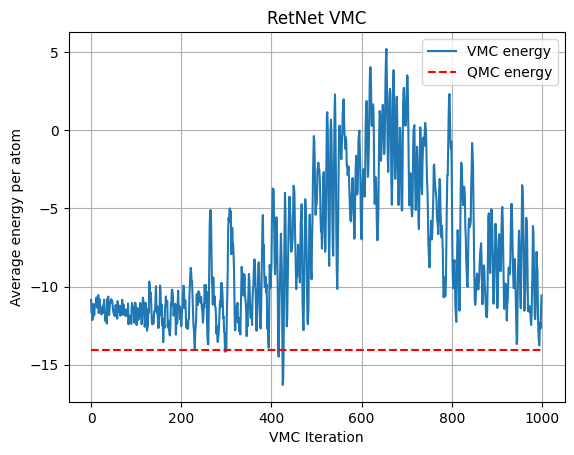

Here is an experiment of training multiple RNN's with different seeds on Schuyler's data to see what energy it converges on. What's interesting, but has been seen before, is that at a point, the energy reaches a minimum and then increases again. Because the energy is not used in the loss function, it is not optimized, and thus acts as a way of testing for overfitting. This is what we see here. What's interesting is that after reaching this point, the losses all change in the same way suggesting that all the RNN's with the low energy have similar parameters.

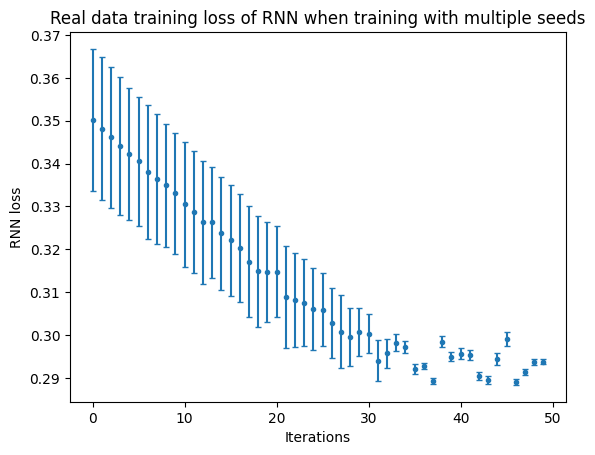
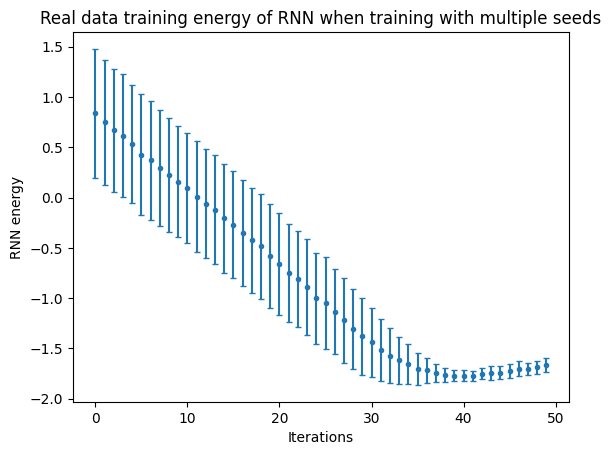



## Comparing transformers to RNNS
|        | transformers  | RNN |
| -------| ------------- | --- |
| Sampling| Requires being run multiple times, one for each qubit  | Requires running single rnn cell once for each qubit |
| Find probability of state | Requires being run once | Requires a full run of rnn cells |

For transformer sampling, you don't have a choice about how long it will take. You will always be multiplying the runtime of transformer by the number of atoms. However for the rnn, this is not the case, and ideally the rnn sampling will take just as long as a full run of the rnn. However, this is python, and running loops is always considerably slower than running it all at once. When I tested this out with the GRU, for 144 atoms, a full run of the rnn took 1.2 seconds, and the sampling took $0.2\times 144=28.8$ seconds. This is only 6 times faster than if we ran the full rnn every single time as supposed to $1/144$ of it. With the simple RNN as supposed to GRU, this took 0.05 per cell and 0.3-0.5 in total, which is hardy an improvement from before. Though this turns out to be due to the GPU; if you switch the computation to CPU, the computation will be significantly faster. However, while sampling is faster on cpu, calculating $H_{loc}$ is significantly faster on gpu.

# Aquila Results


Aquila ran all my tasks back to back, which allowed me to measure how long each task took using the end times of each task. Dividing this by the number of shots per task, 1000, we obtain the time per shot (of 64 atoms). 
$$\text{time per shot} = 0.38622598989898993\pm 0.0012619456638397007 s$$

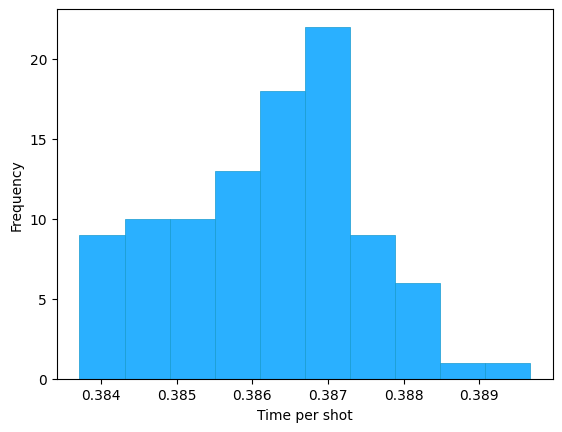

Upon reorganizing the data so it's easier to manipulate, such as converting the 4 arrays of 4x4 atoms to a large list of 4x4 arrays, I could do analysis on it.

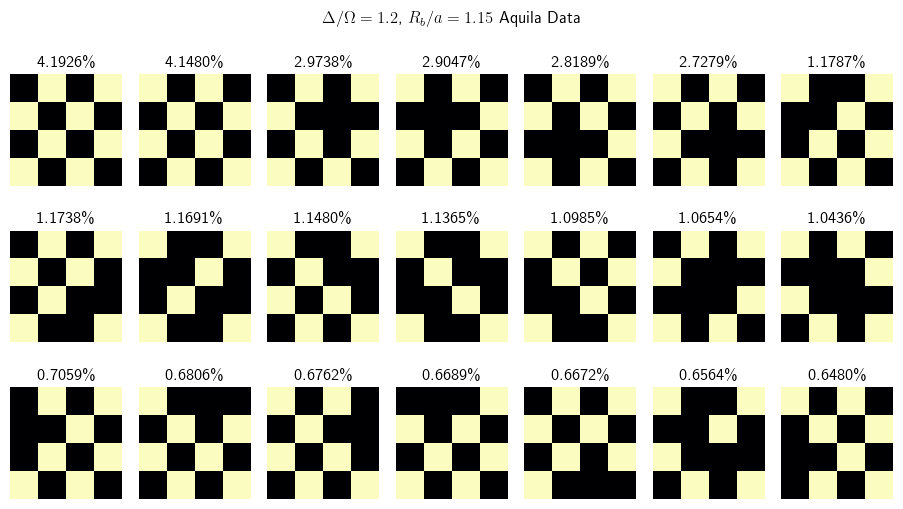

vs the corresponding QMC data

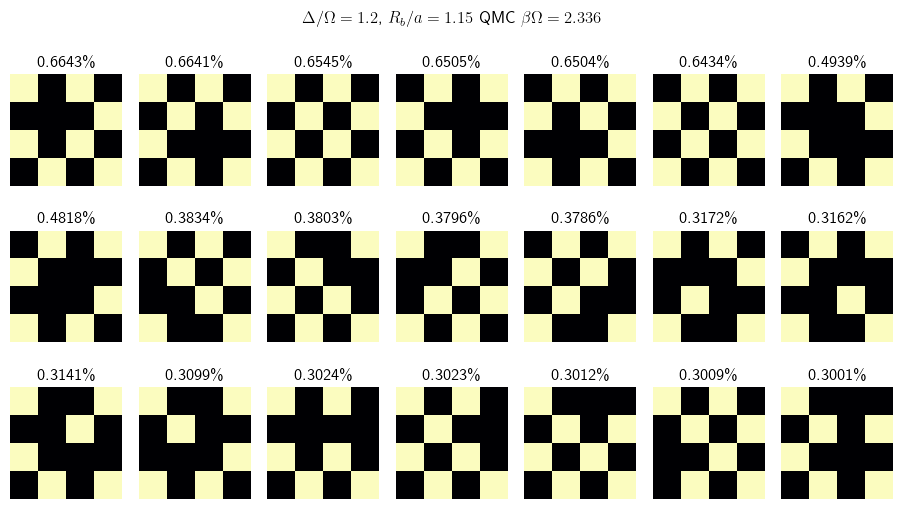

We note that in the Aquila data, the checkerboard pattern is significantly more common. This would suggest a low temperature, but a point on the phase space which is further into the checkerboard region.

Now to compare this Aquila to the corresponding QMC data, we will use the two approaches that were done previously. Converting the state to a binary number and computing a histogram, then finding the Jansen-Shannon divergence between that and the histograms found using QMC. For the $\beta$ in which the JSD is a minimum, we will conclude that the Aquila data distribution is closest to that temperature. Doing this gives the following plot:

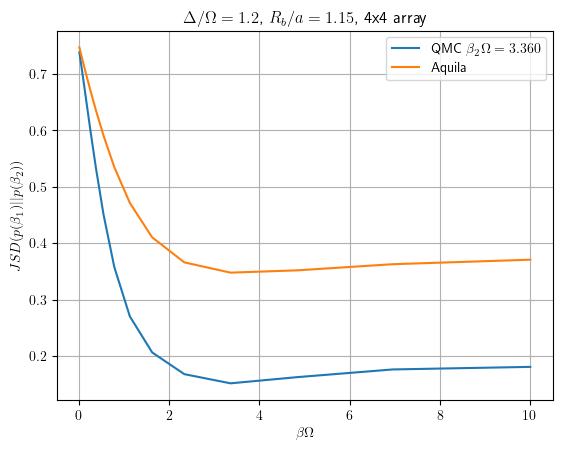

And as a sanity check we calculate the average occupation of our data and compare it with the average occupation for each temperature. If Aquila data were to have a Gibbs distribution, the Aquila average occupation should agree with the QMC average occupation, and this plot and the previous should point to the same $\beta$.

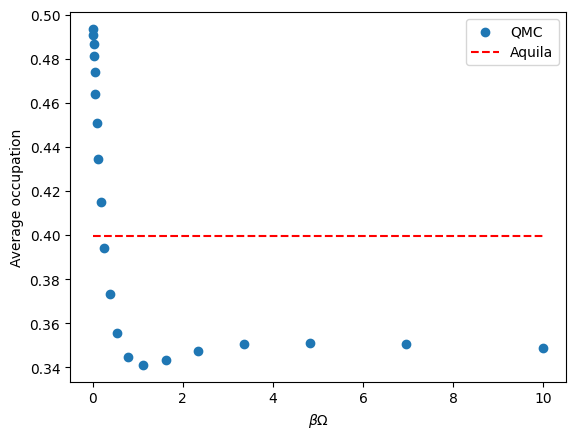

Doing interpolation gives that, for Aquila's average occupation, it should have the following temperature:

$\beta\Omega = 0.23900119500597503$

This is a large disagreement. So much so that it's worth looking into. Why does the average occupation suggest such a high temperature? I am currently under the impression that we are looking at a different point in the phase space than what was sampled.

You may note that this plot changes a lot more than the previous ones. This is because the high temperature scale is very high. The full distribution of the average occupation will trend as follows

* For low temperatures, increasing the temperature slightly will have almost no affect on the average occupation. This is when the checkerboard patter is most favourable.
* As the temperature inceases, the average occupation will actually decrease. This is because staying in the checkerboard pattern will be less common and it will be more likely to remove some Rydberg atoms than adding more.
* Inceasing the temperature even more will cause the average occupation to increase significantly. Here it's possible to have a lot of Rydberg atoms close but also possible to find very few due to thermal noise.

High temperatures vary in average occupation a lot, whereas low temperatures do not.

The below plot is a comparison of the average occupation for another point on the phase space. We note that this corresponds to the right part of the above plot. This is for a point more in the checkerboard phase where the average occupation is larger due to the checkerboard pattern being more common.

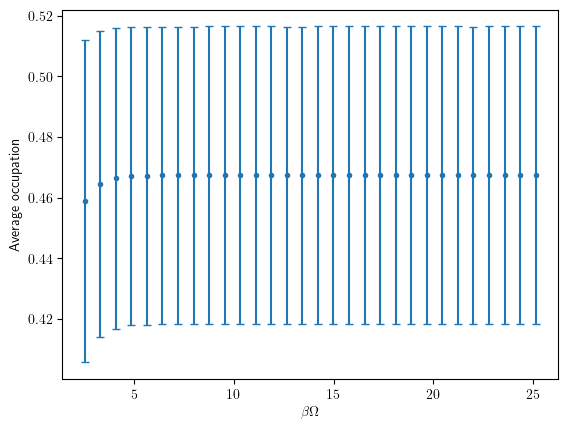

This analysis suggests that the point on the phase space which I ran on the quantum computer is different from what I thought it was. It seems to be further in the checkerboard phase than intended. Our goal is to figure out which $\Delta/\Omega$ the data corresponds to (it is very likely that the $R_b/a$ is correct). To do this, I will be simulating data for many $\Delta/\Omega$ and $\beta\Omega$ values

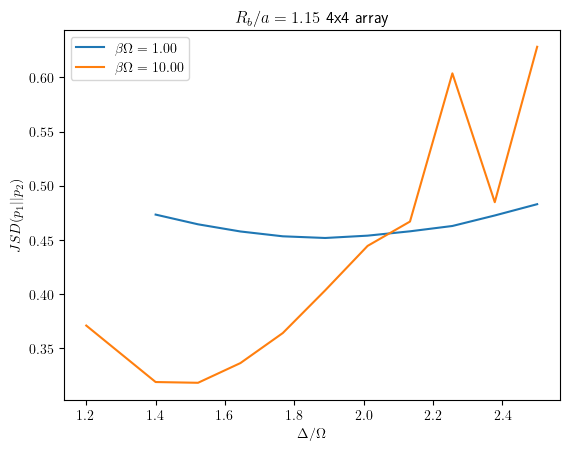

In this plot, we will be interested in the higher $\beta\Omega$ values since the JSD decreases to a lower value.

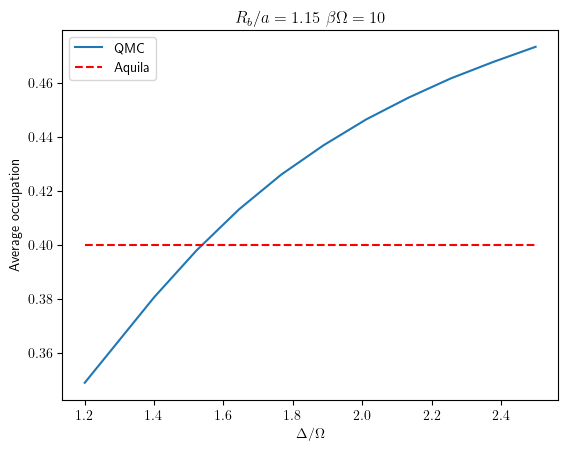
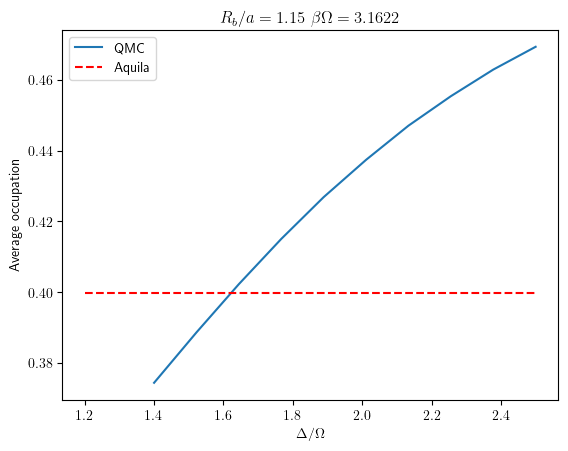
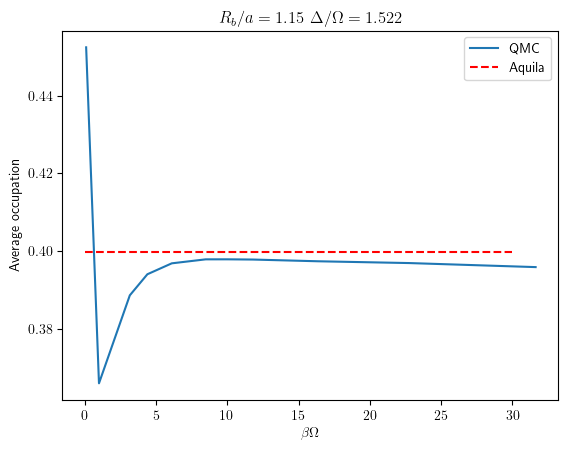

The intersection appears at $\Delta/\Omega= 1.5365076825384125$, when assuming $\Omega\beta=10$

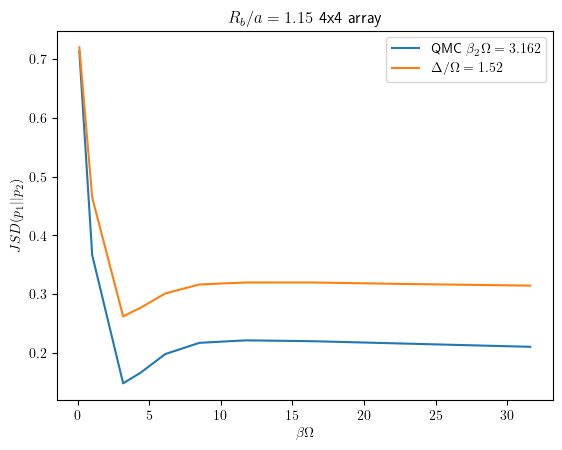

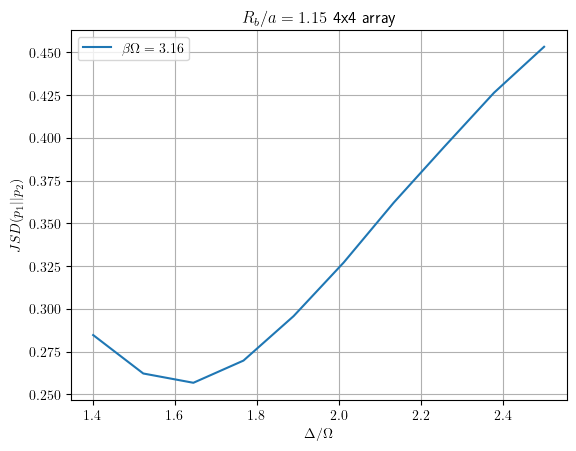

This analysis narrows the state down to $R_b/a=1.15$, $\Delta/\Omega\in[1.4,1.6]$, $\beta\Omega\in[0.3,0.4]$, where my best guess before doing more exact computations is $\Delta/\Omega=1.5$ and $\beta\Omega=3.15$



The following plot shows a bunch of different pairings of $\Delta/\Omega$ and $\beta\Omega$ and how close their average occupation is to what was observed in Aquila. The color is calculated with $\sqrt{|\langle n_{qmv}\rangle-\langle n_{aquila}\rangle|}$, averaging over $10^5$ shots. There is a curve of $\Delta/\Omega$ and $\beta\Omega$ values where the occupation matches. When $\Delta/\Omega$ is lower, there is more uncertainty in $\beta\Omega$, but the opposite is true for larger values of $\Delta/\Omega$. Once we compare the JSD between the Aquila data and all this QMC data, we will be able to find the minimum, and see if it matches up with this result.

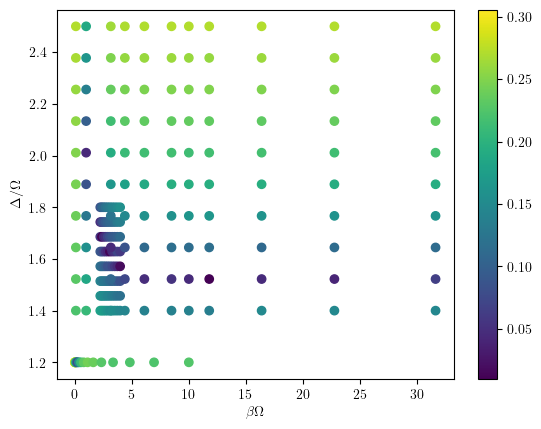
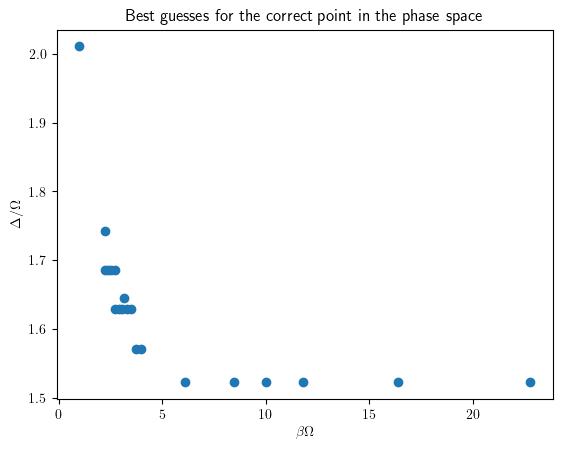

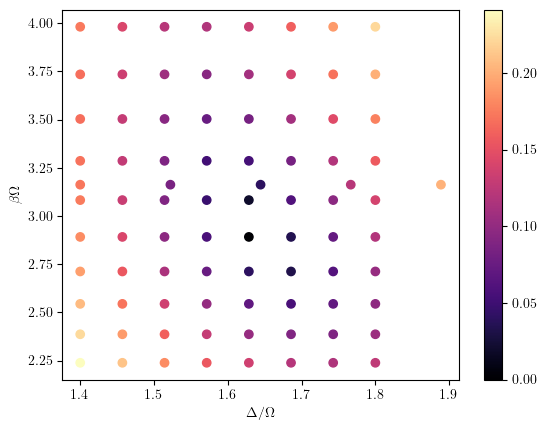

Below we have 3d plots of the same data, except interpolated. The z-axis is JSD. The surface on the bottom is the JSD of qmc with qmc data of the same temperature, the ideal case for what the JSD can be.

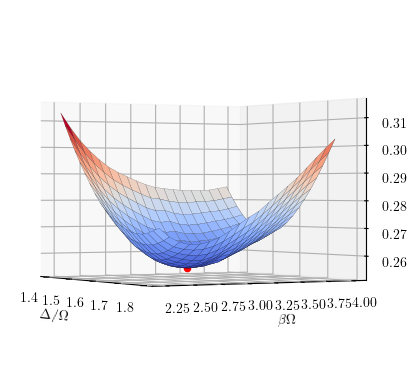
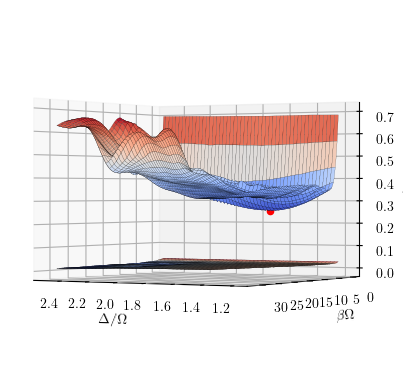

By doing interpolation, I found that the minimum is at

$$\delta/\Omega=1.63648469,\quad \beta\Omega=2.91057046$$

At this point, the average occupations also agree. The following plot is the average occupation, as a function of $\Delta/\Omega$ and $\beta\Omega$

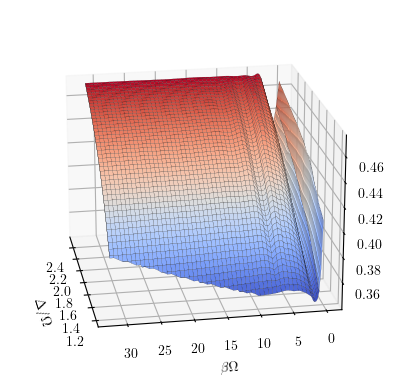

Where the average occupation interpolates to a value of 0.399051, which is very close to the measured average occupation of 0.3997578125. 

However, it does also seem like the minimum $R_b/a$ is actually larger than what it should be. The minimum is around $1.1875$ as supposed to $1.15$.

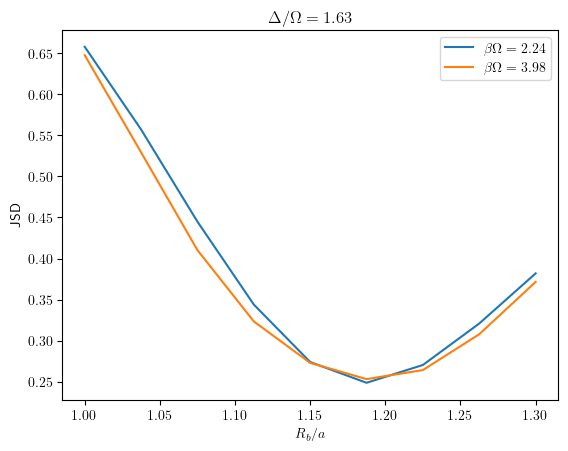

The next question arises, how else can we reason the discrepancy between Aquila data and the qmc data? How close is it to being thermal noise?

## Adiabatic state preparation

$$\mathcal{H}=\frac{\Omega}{2}\sum_i \sigma^x - \delta \sum_i n_i +\sum_{i<j} V_{ij} n_i n_j$$

When $\Omega=0$, we are left with the Hamiltonian
$$\mathcal{H}=- \delta \sum_i n_i +\sum_{i<j} V_{ij} n_i n_j$$
This Hamiltonian commutes with the $n_i$ operator, thus the basis of $|g\rangle$ and $|r\rangle$, which is the only one that we can measure, will not evolve in time.

The reason for having the Rabi Frequency first turn on then off is as follows
* it needs to start with $\Omega=0$ to begin in the ground state.
* it needs to evolve with the correct $\Omega$ 
* once $\Omega=0$, the system stops evolving in time.